In [26]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [27]:
# output_base_folder = Path("/Users/che/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/iarai/home/ivan.svogor/git/storage-benchmarking/src/benchmark_output/batch_pool")

## Benchmarking asyncio implementation only (no workers)

**benchmark_dataloader**

| param | range |
| --- | --- |
| num_workers | 0 |
|num_fetch_workers | 1,2,4,6,8,..,128 | 
| dataset | s3,scratch |
| num_batches | 40 |
| batch_size | 128 |


In [28]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers"]

In [29]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="**/*dataloader*")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 3188/3188 [00:22<00:00, 140.55it/s]


In [30]:
for col in df_dataloader.columns:
    print(col)

trace_name
trace_level
function_name
elapsed
time_start
time_end
process_time
process_time_start
process_time_end
pid
threading_ident
len
output_base_folder
dataset
batch_size
num_workers
data_loader_type
num_fetch_workers
prefetch_factor
repeat
num_batches
shuffle
fetch_impl
batch_pool
system
node
release
version
machine
source_file
run


In [31]:
df_dataloader["dataset"]

0         s3
1         s3
2         s3
3         s3
4         s3
      ...   
1    scratch
0    scratch
1    scratch
0    scratch
1    scratch
Name: dataset, Length: 435456, dtype: object

In [34]:
df_dataloader_zeroworkers=df_dataloader[df_dataloader["num_workers"]==0]
df_dataloader_zeroworkers=df_dataloader_zeroworkers[df_dataloader_zeroworkers["dataset"]=="s3"]
df_dataloader_zeroworkers

,trace_name,trace_level,function_name,elapsed,time_start,time_end,process_time,process_time_start,process_time_end,pid,...,shuffle,fetch_impl,batch_pool,system,node,release,version,machine,source_file,run
0,(2)-load_all,2,load_all,0.004905,1.632209e+09,1.632209e+09,0.038991,2.934867,2.973858,20488,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092919_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.017544,1.632209e+09,1.632209e+09,0.051858,2.922883,2.974741,20488,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092919_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.009416,1.632209e+09,1.632209e+09,0.108871,3.010123,3.118994,20776,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092922_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.029896,1.632209e+09,1.632209e+09,0.132651,2.990476,3.123128,20776,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092922_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.007081,1.632209e+09,1.632209e+09,0.045416,2.976358,3.021774,20994,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092924_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.021805,1.632209e+09,1.632209e+09,0.060097,2.962087,3.022184,20994,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092924_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.005966,1.632209e+09,1.632209e+09,0.069311,2.954596,3.023907,21399,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092927_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.021367,1.632209e+09,1.632209e+09,0.085047,2.939818,3.024865,21399,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092927_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.006627,1.632209e+09,1.632209e+09,0.028314,2.451672,2.479985,21668,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092930_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.021304,1.632209e+09,1.632209e+09,0.098463,2.437713,2.536177,21668,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092930_benchmark_dataloader_s3_128_0_...


In [35]:
print(df_dataloader_zeroworkers.groupby(group_by_dataloader).groups.keys())

dict_keys([('s3', 1, 0), ('s3', 2, 0), ('s3', 4, 0), ('s3', 8, 0), ('s3', 16, 0), ('s3', 32, 0), ('s3', 64, 0), ('s3', 128, 0)])


In [36]:
display(get_run_stats(df_dataloader_zeroworkers, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers run                                                                       
s3      1                 0           20210921f092919_benchmark_dataloader_s3_128_0_1...                  0.0   
        2                 0           20210921f092922_benchmark_dataloader_s3_128_0_2...                  0.0   
        4                 0           20210921f092924_benchmark_dataloader_s3_128_0_4...                  0.0   
        8                 0           20210921f092927_benchmark_dataloader_s3_128_0_8...                  0.0   
        16                0           20210921f092930_benchmark_dataloader_s3_128_0_1...                  0.0   
        32                0           20210921f092933_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093005_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093007_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093010_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093014_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093016_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093019_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093022_benchmark_dataloader_s3_128_0_3...                  0.0   
                                      20210921f093025_benchmark_dataloader_s3_128_0_3...                  0.0   
        64                0           20210921f092936_benchmark_dataloader_s3_128_0_6...                  0.0   
        128               0           20210921f092939_benchmark_dataloader_s3_128_0_1...                  0.0   

                                                                                            time_start  \
dataset num_fetch_workers num_workers run                                                                
s3      1                 0           20210921f092919_benchmark_dataloader_s3_128_0_1...  1.632209e+09   
        2                 0           20210921f092922_benchmark_dataloader_s3_128_0_2...  1.632209e+09   
        4                 0           20210921f092924_benchmark_dataloader_s3_128_0_4...  1.632209e+09   
        8                 0           20210921f092927_benchmark_dataloader_s3_128_0_8...  1.632209e+09   
        16                0           20210921f092930_benchmark_dataloader_s3_128_0_1...  1.632209e+09   
        32                0           20210921f092933_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093005_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093007_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093010_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093014_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093016_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093019_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093022_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
                                      20210921f093025_benchmark_dataloader_s3_128_0_3...  1.632209e+09   
        64                0           20210921f092936_benchmark_dataloader_s3_128_0_6...  1.632209e+09   
        128               0           20210921f092939_benchmark_dataloader_s3_128_0_1...  1.632209e+09   

                                                                                              time_end  \
dataset num_fetch_workers num_workers ru

### Event plots of dataloading

Let's visualize the timeline of dataloading, a new color for each thread (cycle 8)

In [37]:
__num_fetch_workers=32
df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==__num_fetch_workers]["run"].iloc[0]
df_dataloader_zeroworkers

,trace_name,trace_level,function_name,elapsed,time_start,time_end,process_time,process_time_start,process_time_end,pid,...,shuffle,fetch_impl,batch_pool,system,node,release,version,machine,source_file,run
0,(2)-load_all,2,load_all,0.004905,1.632209e+09,1.632209e+09,0.038991,2.934867,2.973858,20488,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092919_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.017544,1.632209e+09,1.632209e+09,0.051858,2.922883,2.974741,20488,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092919_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.009416,1.632209e+09,1.632209e+09,0.108871,3.010123,3.118994,20776,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092922_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.029896,1.632209e+09,1.632209e+09,0.132651,2.990476,3.123128,20776,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092922_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.007081,1.632209e+09,1.632209e+09,0.045416,2.976358,3.021774,20994,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092924_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.021805,1.632209e+09,1.632209e+09,0.060097,2.962087,3.022184,20994,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092924_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.005966,1.632209e+09,1.632209e+09,0.069311,2.954596,3.023907,21399,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092927_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.021367,1.632209e+09,1.632209e+09,0.085047,2.939818,3.024865,21399,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092927_benchmark_dataloader_s3_128_0_...
0,(2)-load_all,2,load_all,0.006627,1.632209e+09,1.632209e+09,0.028314,2.451672,2.479985,21668,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092930_benchmark_dataloader_s3_128_0_...
1,(1)-benchmark,1,benchmark_dataloader,0.021304,1.632209e+09,1.632209e+09,0.098463,2.437713,2.536177,21668,...,True,threaded,10,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/iarai/home/ivan.svogor/git/storage-benchmarki...,20210921f092930_benchmark_dataloader_s3_128_0_...


The horizontal line at the top is the extend of trace_levels 1/2 (benchmark_dataloader/load_all). Then, below for each batch a step for each batch. With num_workers=0, batches are fetched fully sequentially. We see that the unique thread we see the same fetcher thread is re-used for all data, and data is fetched sequentially within the batch.

total_elapsed=0:00:00.021641
total_bytes=0 Bytes
overall rate 0 Bytes/s
overall rate 0 Bytesit/s


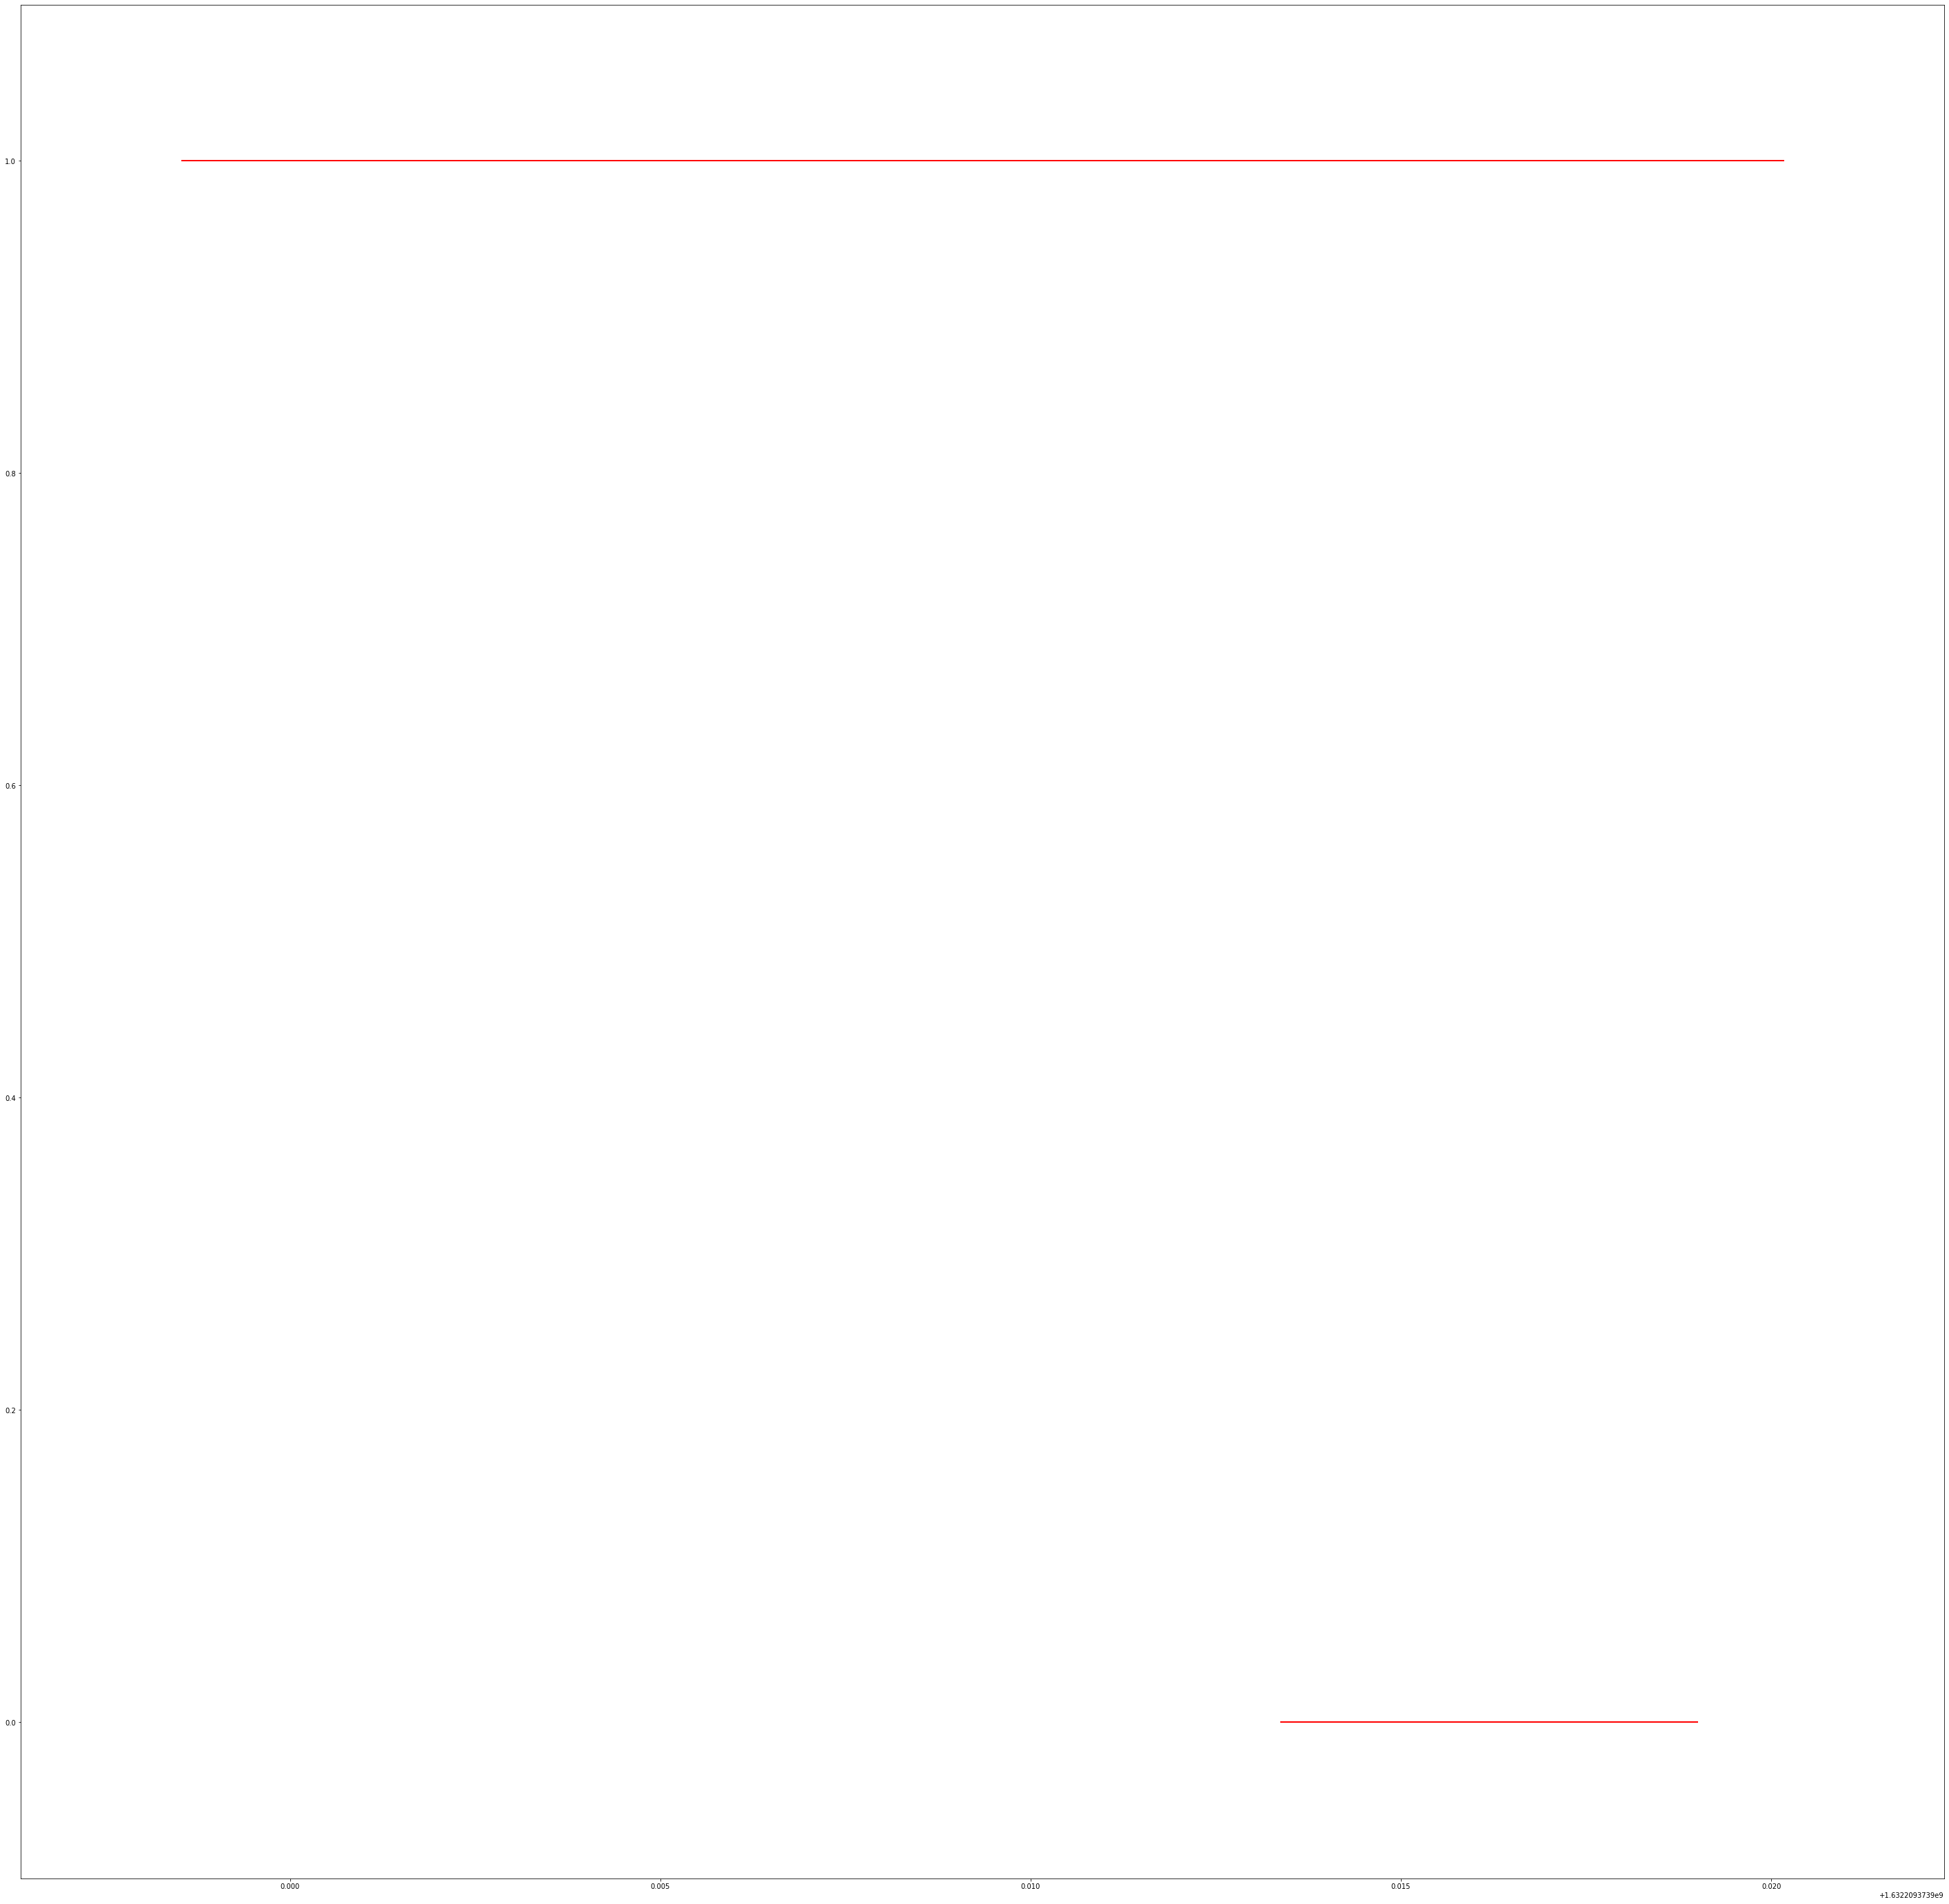

In [38]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==__num_fetch_workers]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

total_elapsed=0:00:00.017540
total_bytes=0 Bytes
overall rate 0 Bytes/s
overall rate 0 Bytesit/s


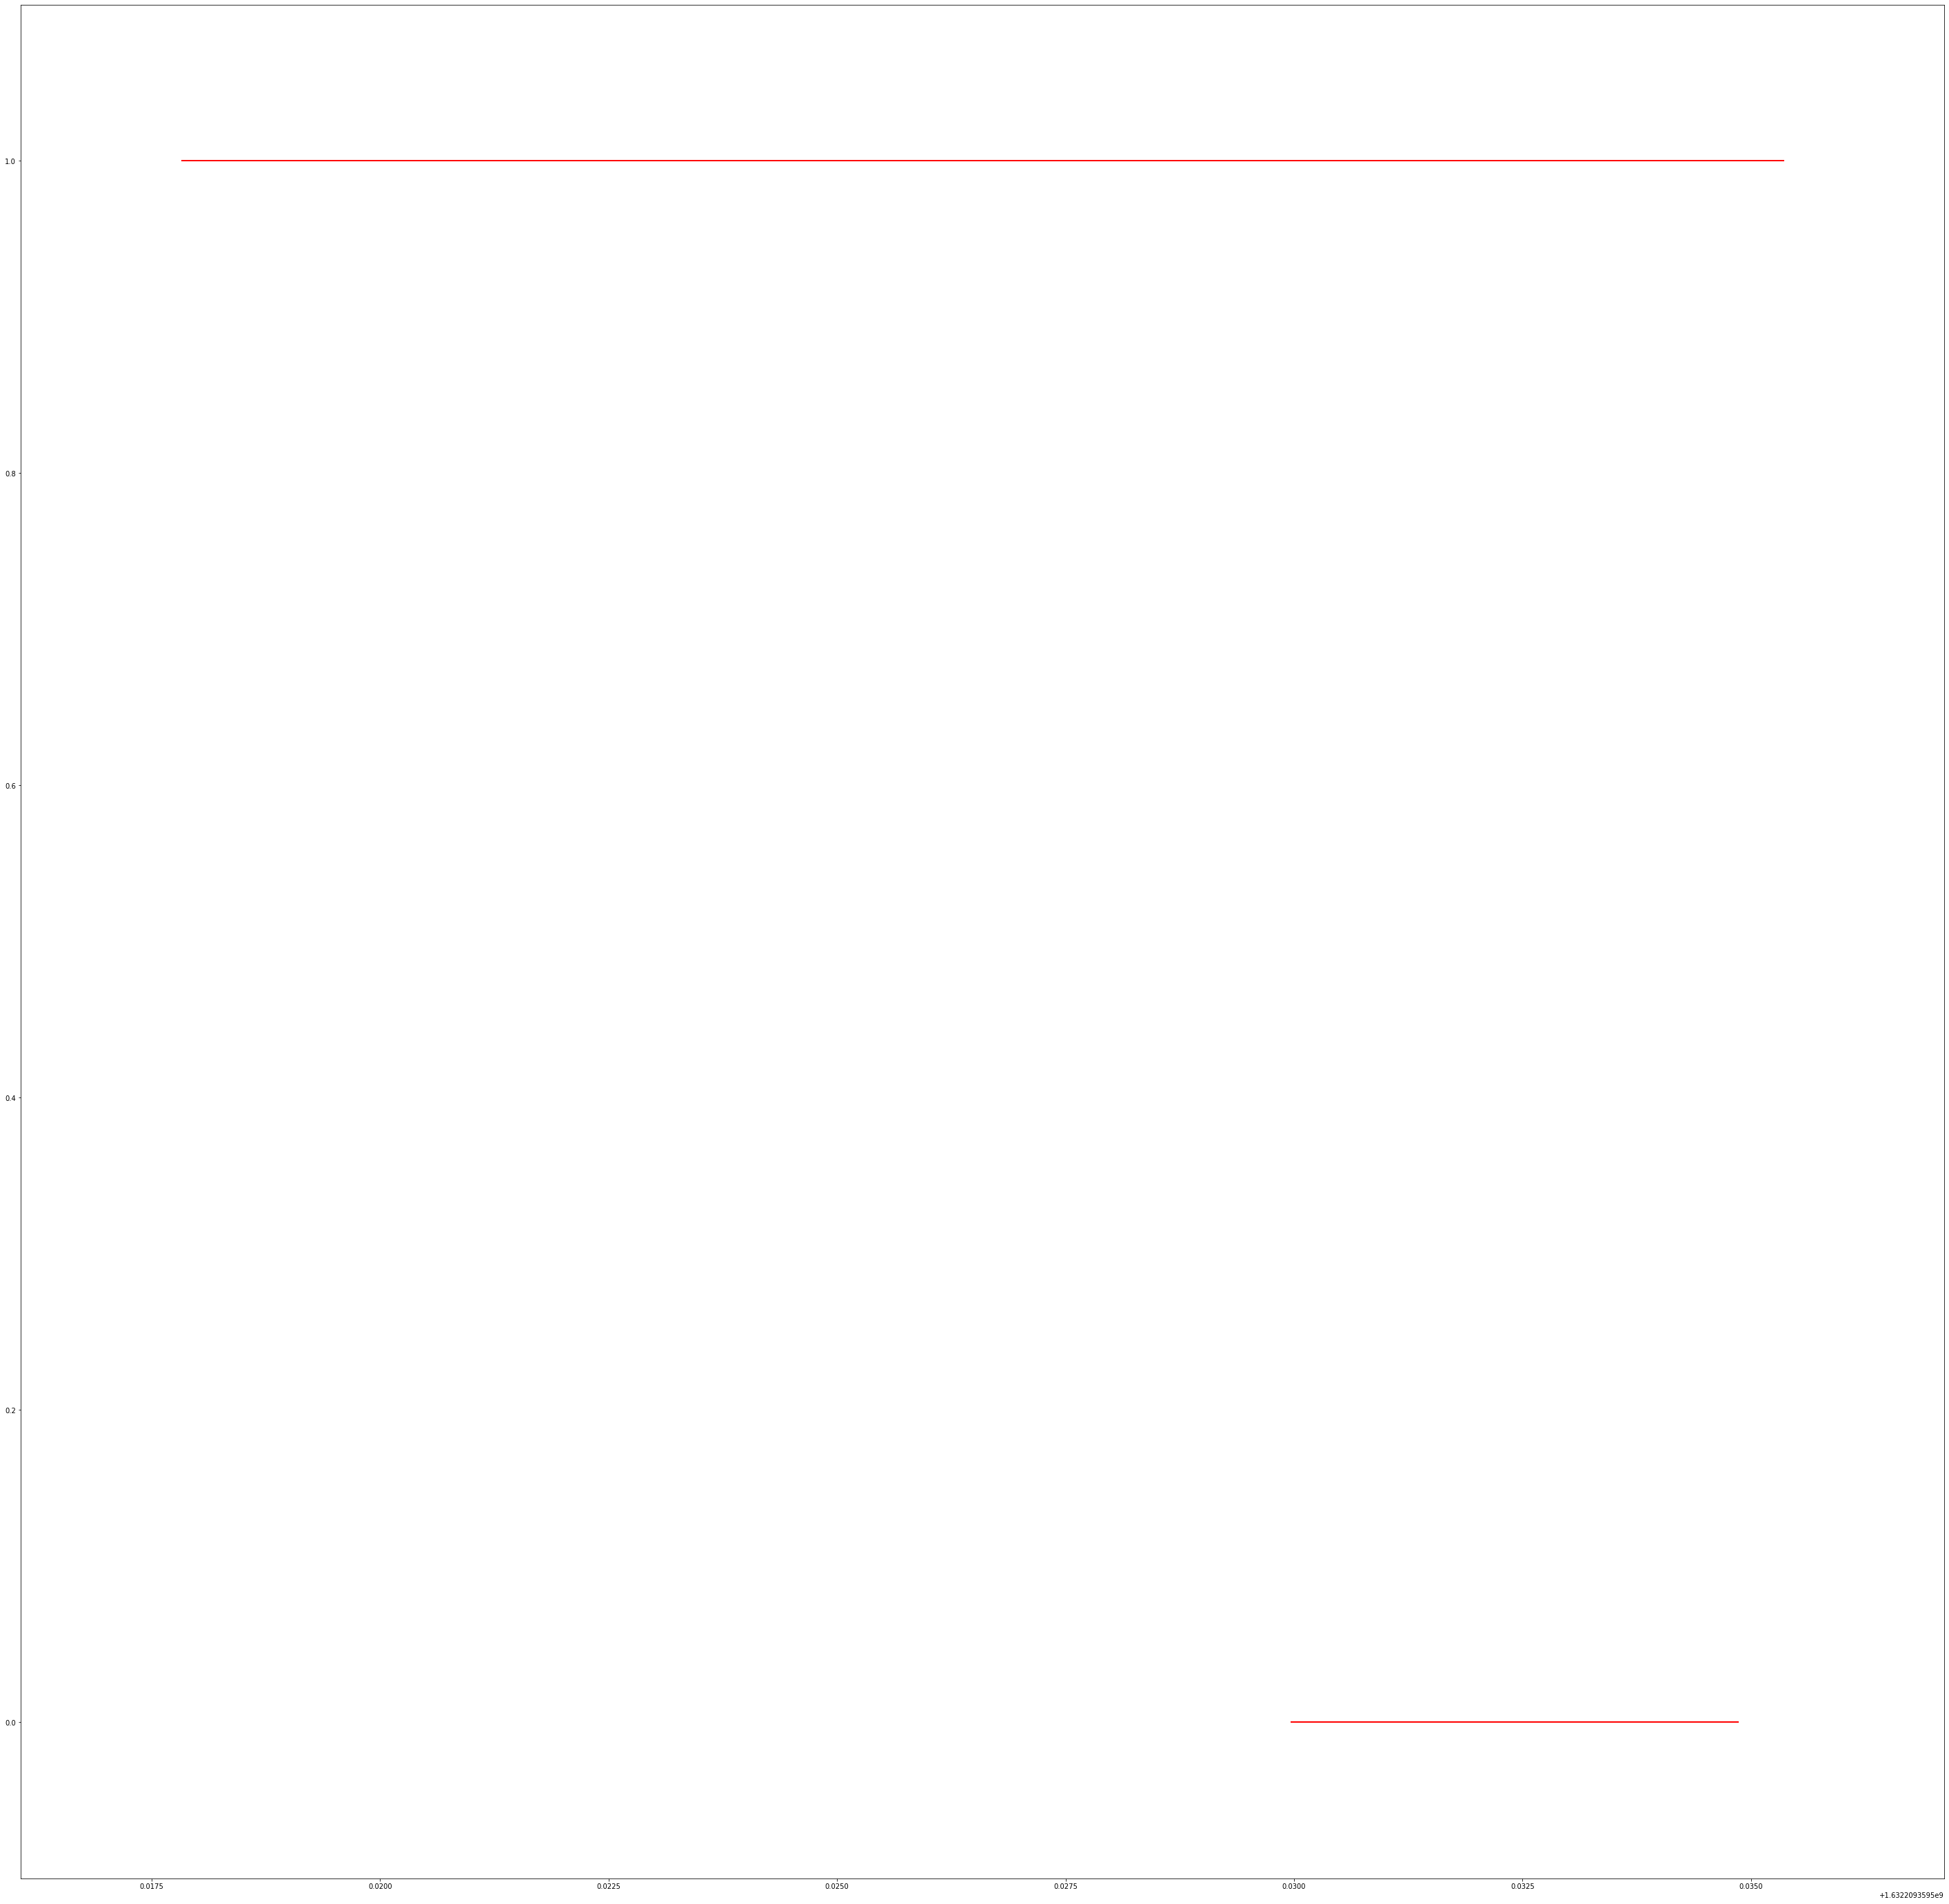

In [16]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==1]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

total_elapsed=0:00:00.021364
total_bytes=0 Bytes
overall rate 0 Bytes/s
overall rate 0 Bytesit/s


<IPython.core.display.Javascript object>


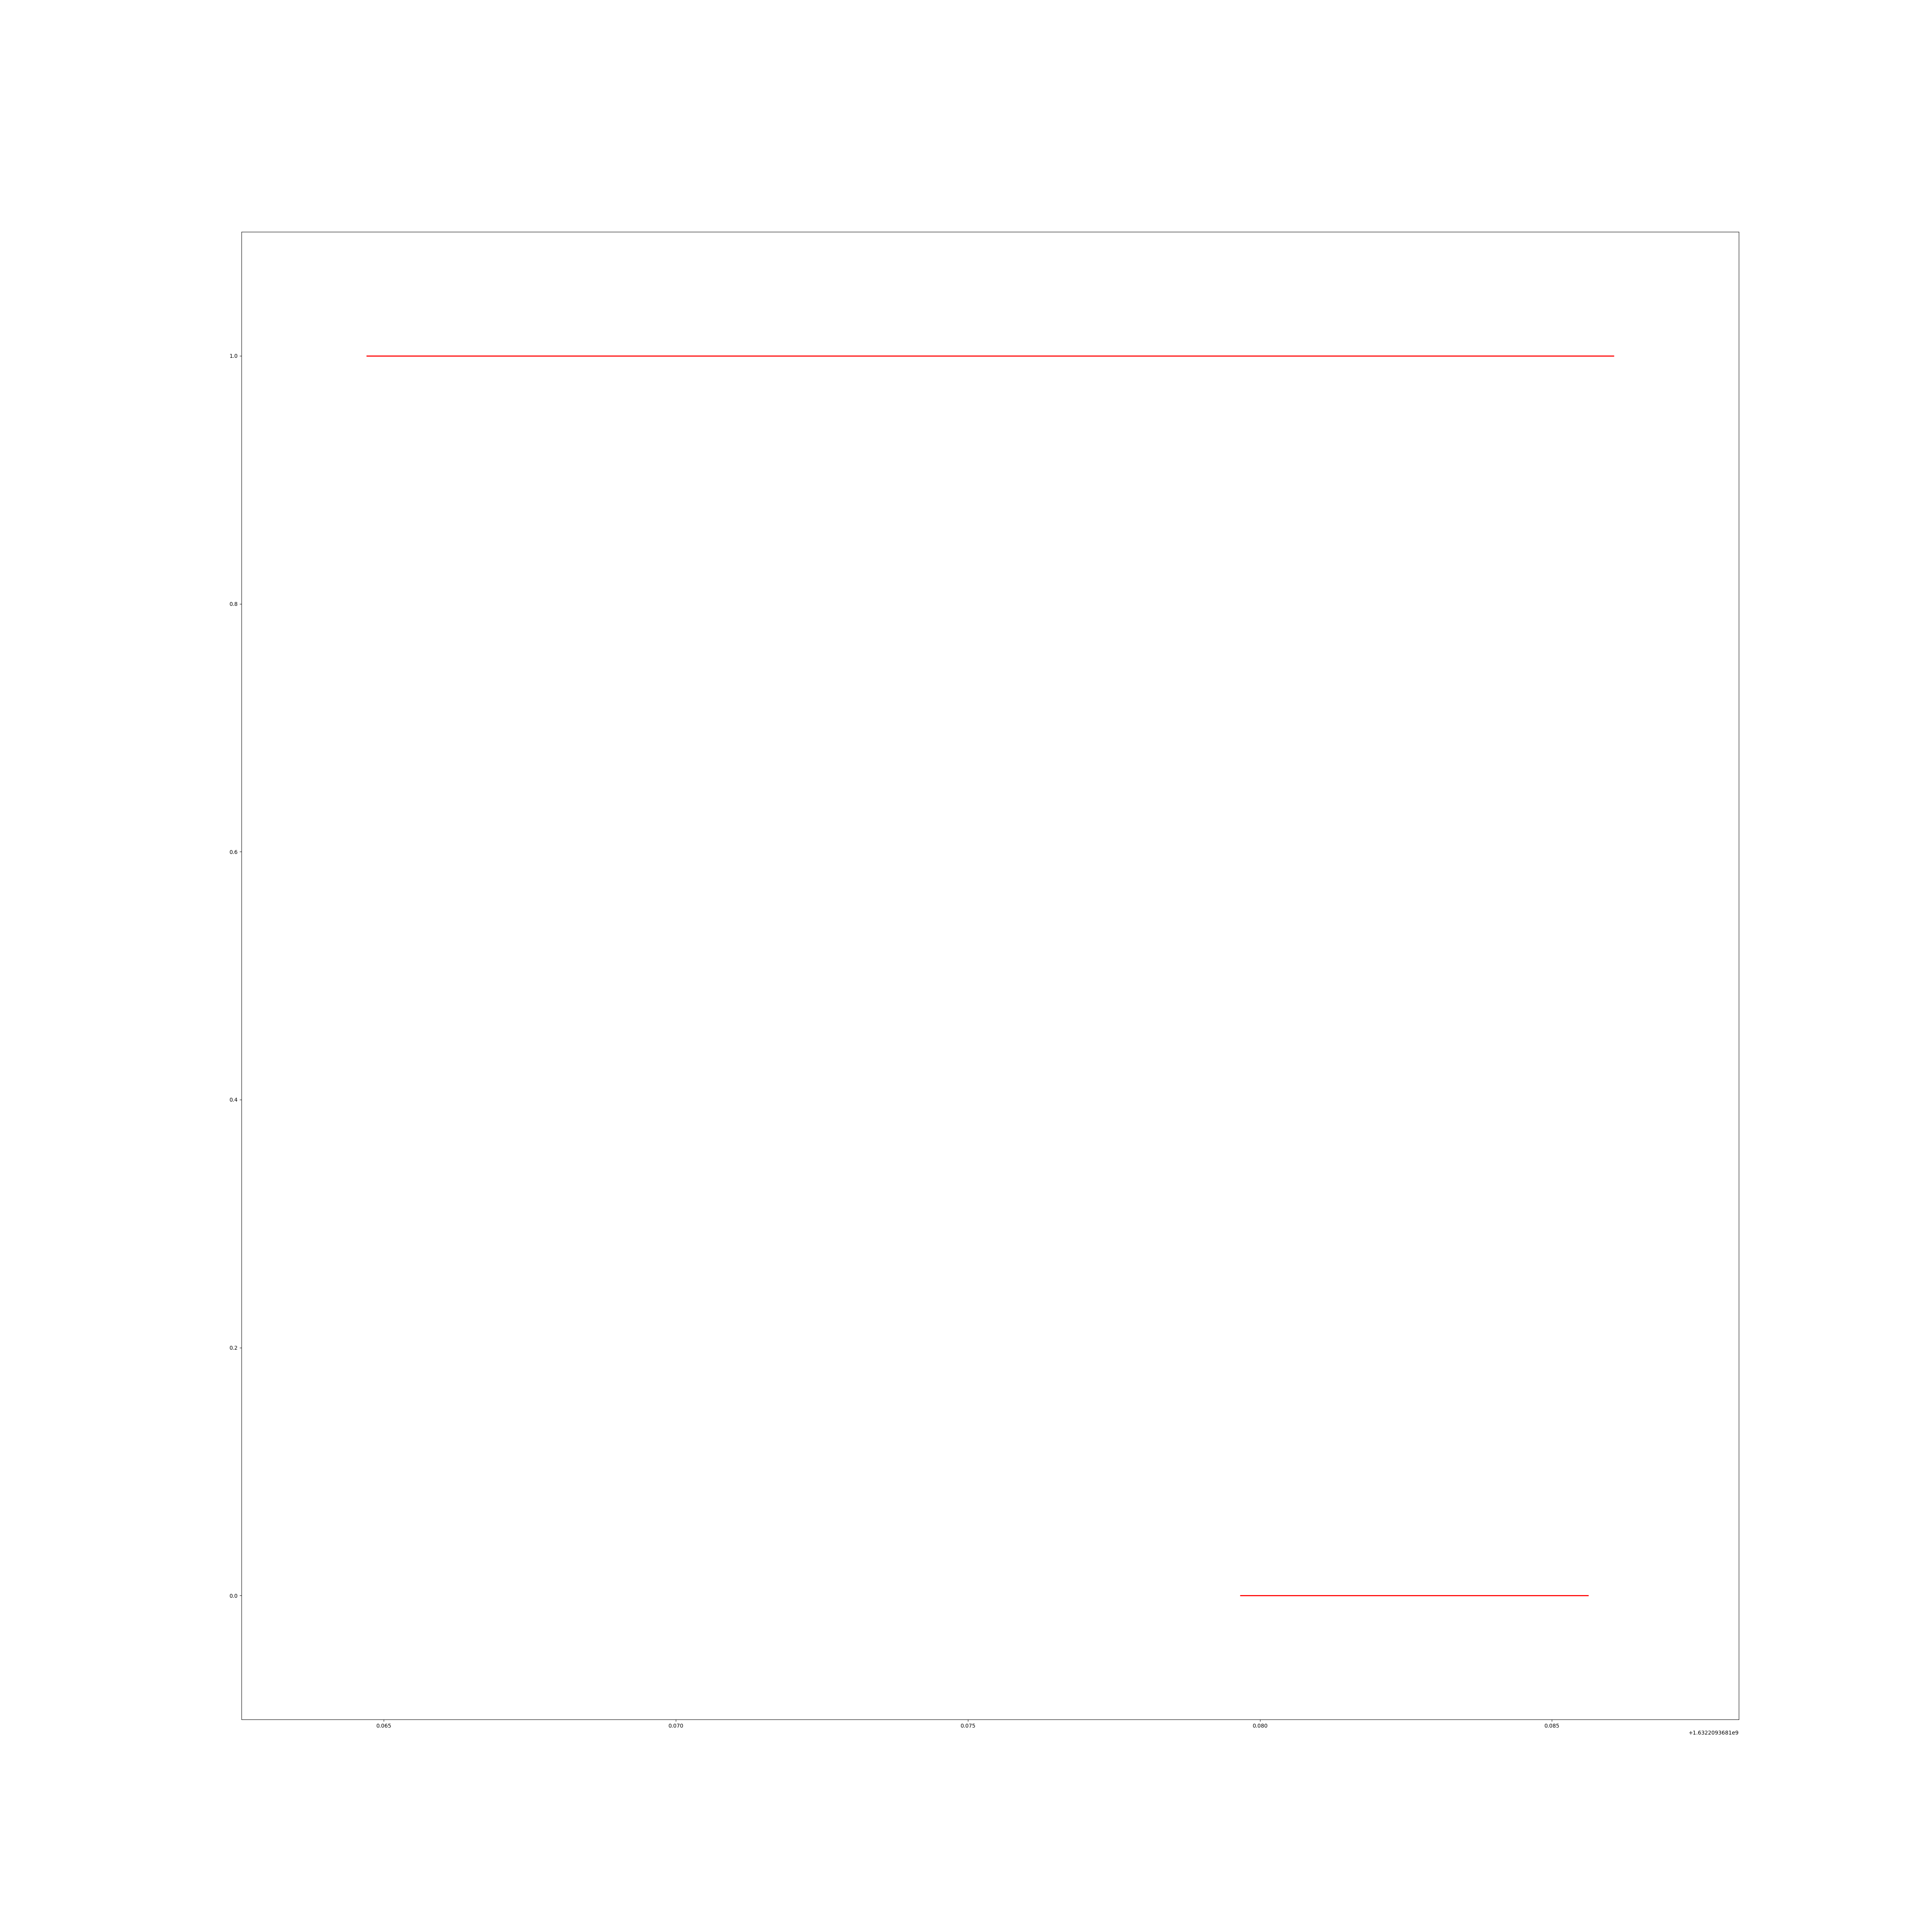

In [99]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==8]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

total_elapsed=0:00:00.021301
total_bytes=0 Bytes
overall rate 0 Bytes/s
overall rate 0 Bytesit/s


<IPython.core.display.Javascript object>


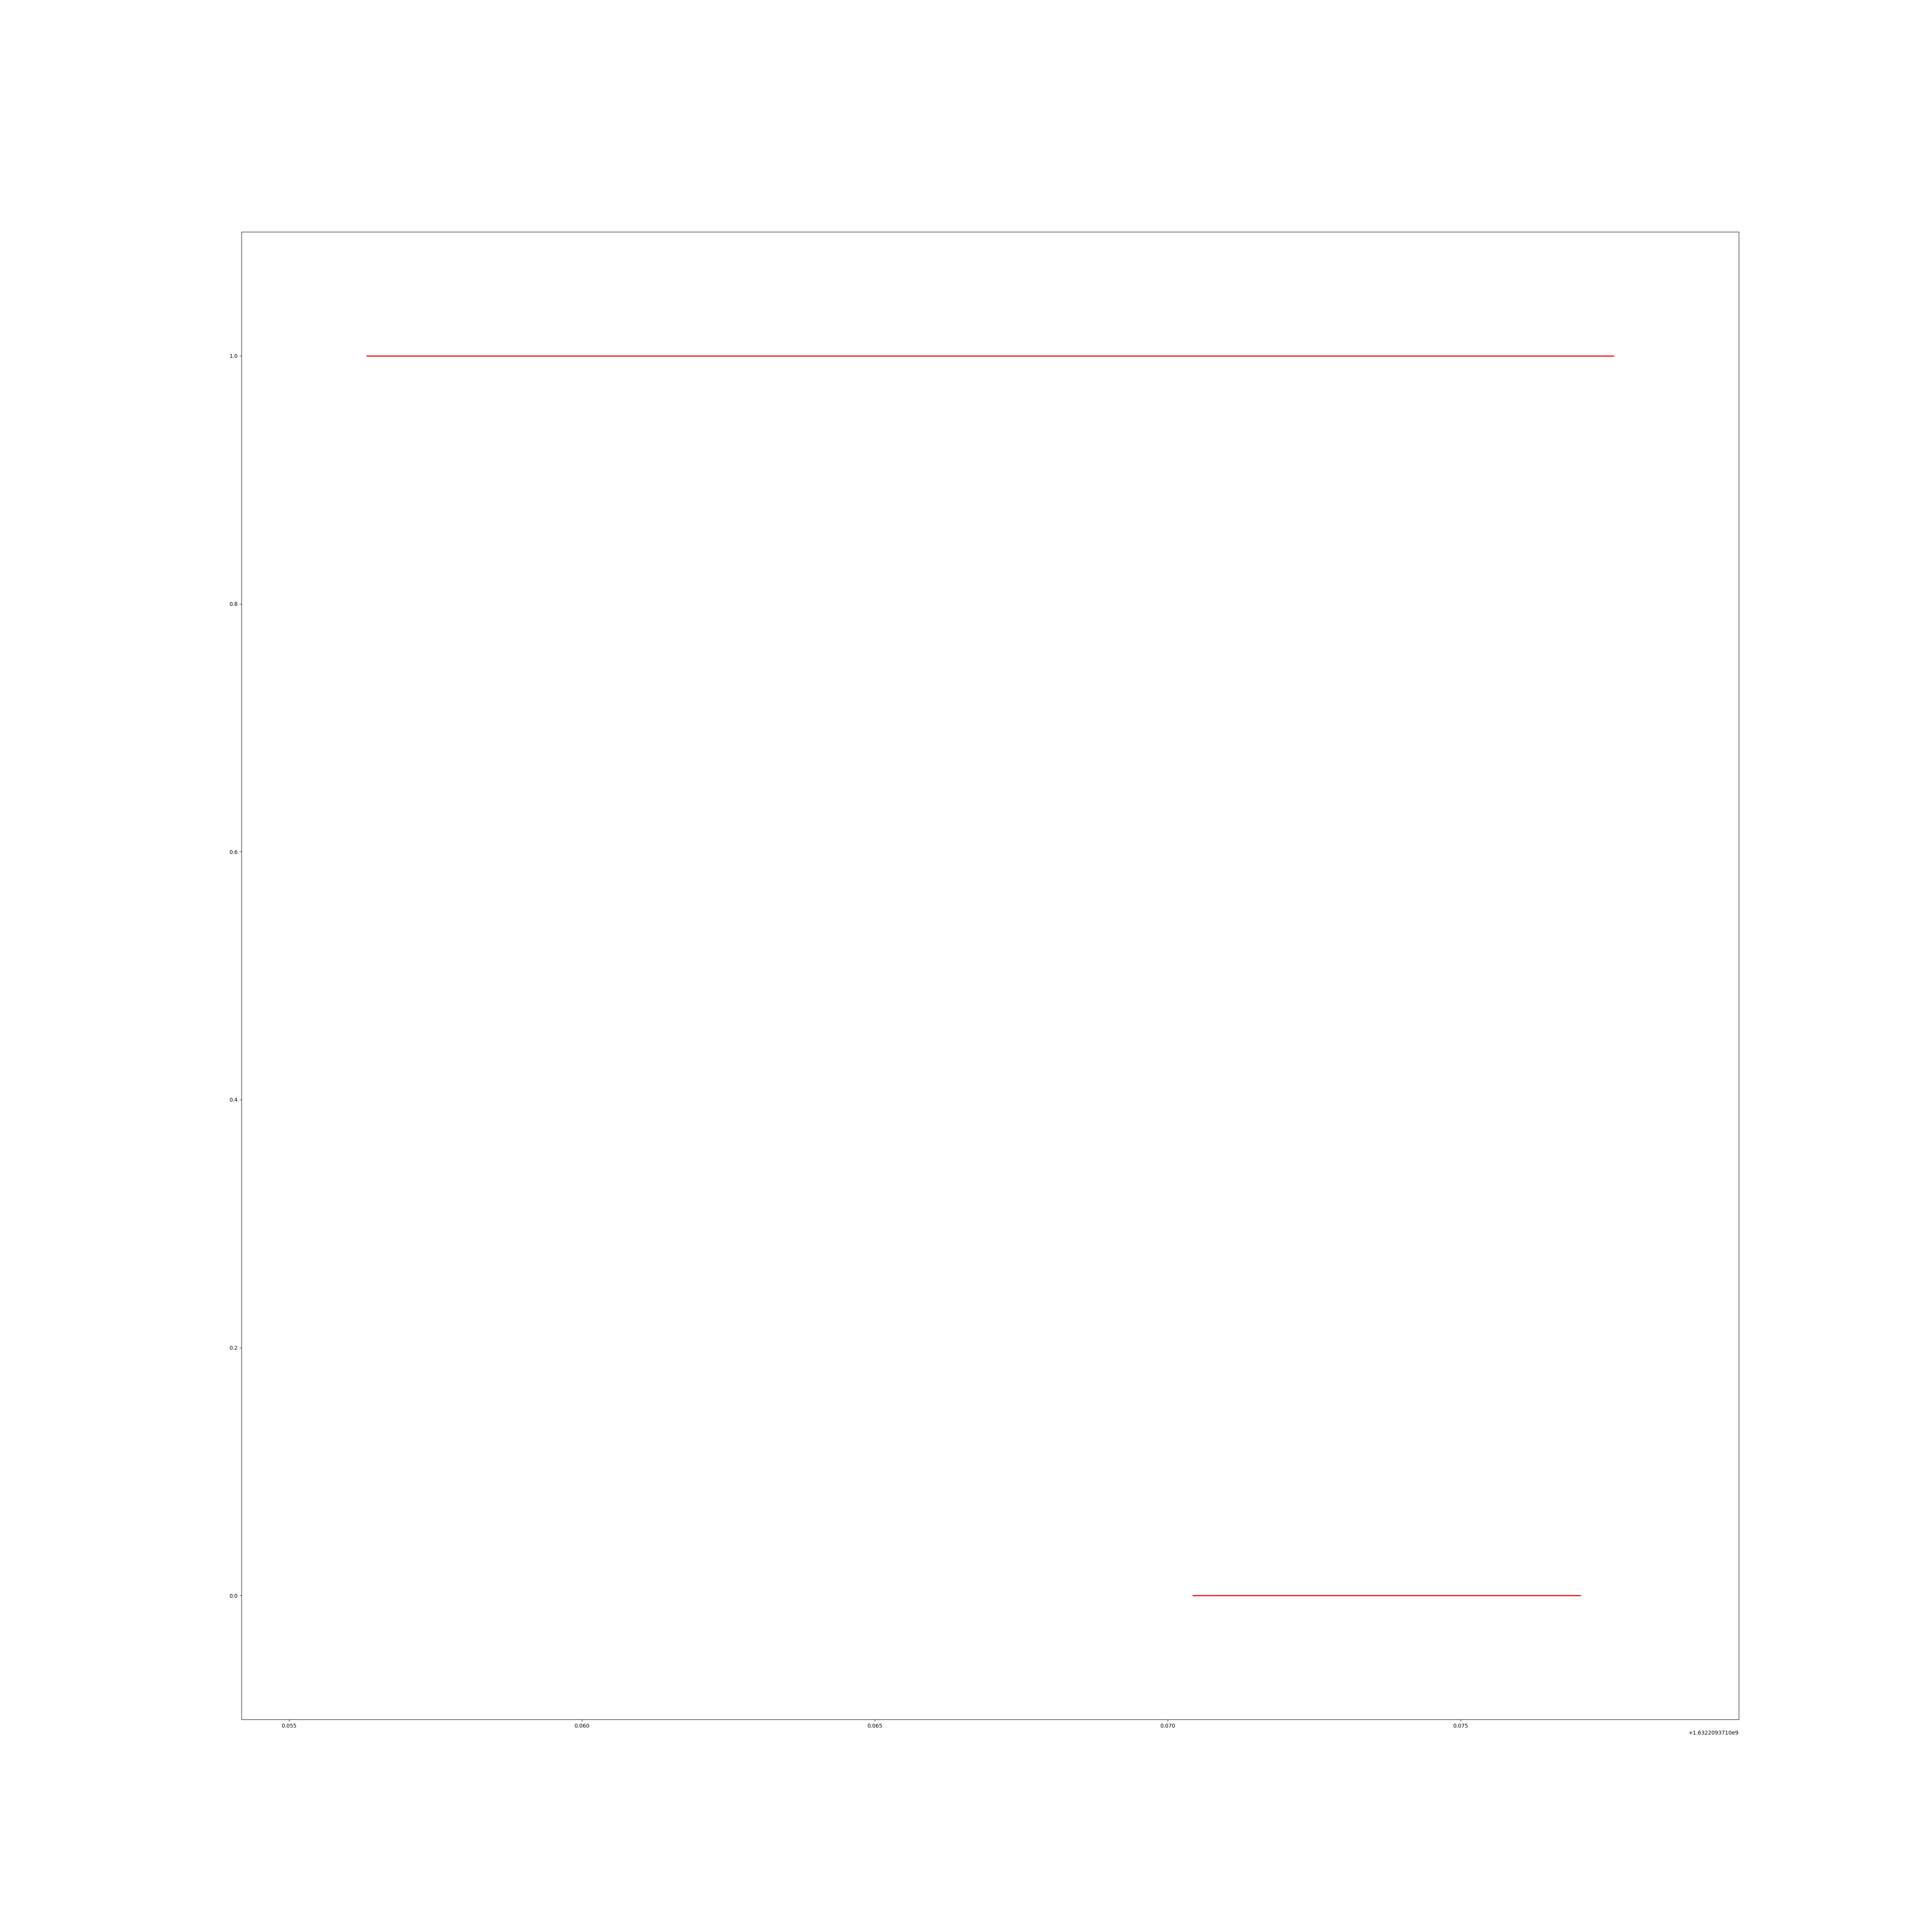

In [98]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==16]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

As we have num_workers=0, batches are processed strictly sequentially. In the following data, we see one hanging request to block the processing of the next batch:

total_elapsed=0:00:09.465603
total_bytes=679.9 MB
overall rate 71.8 MB/s
overall rate 574.6 MBit/s


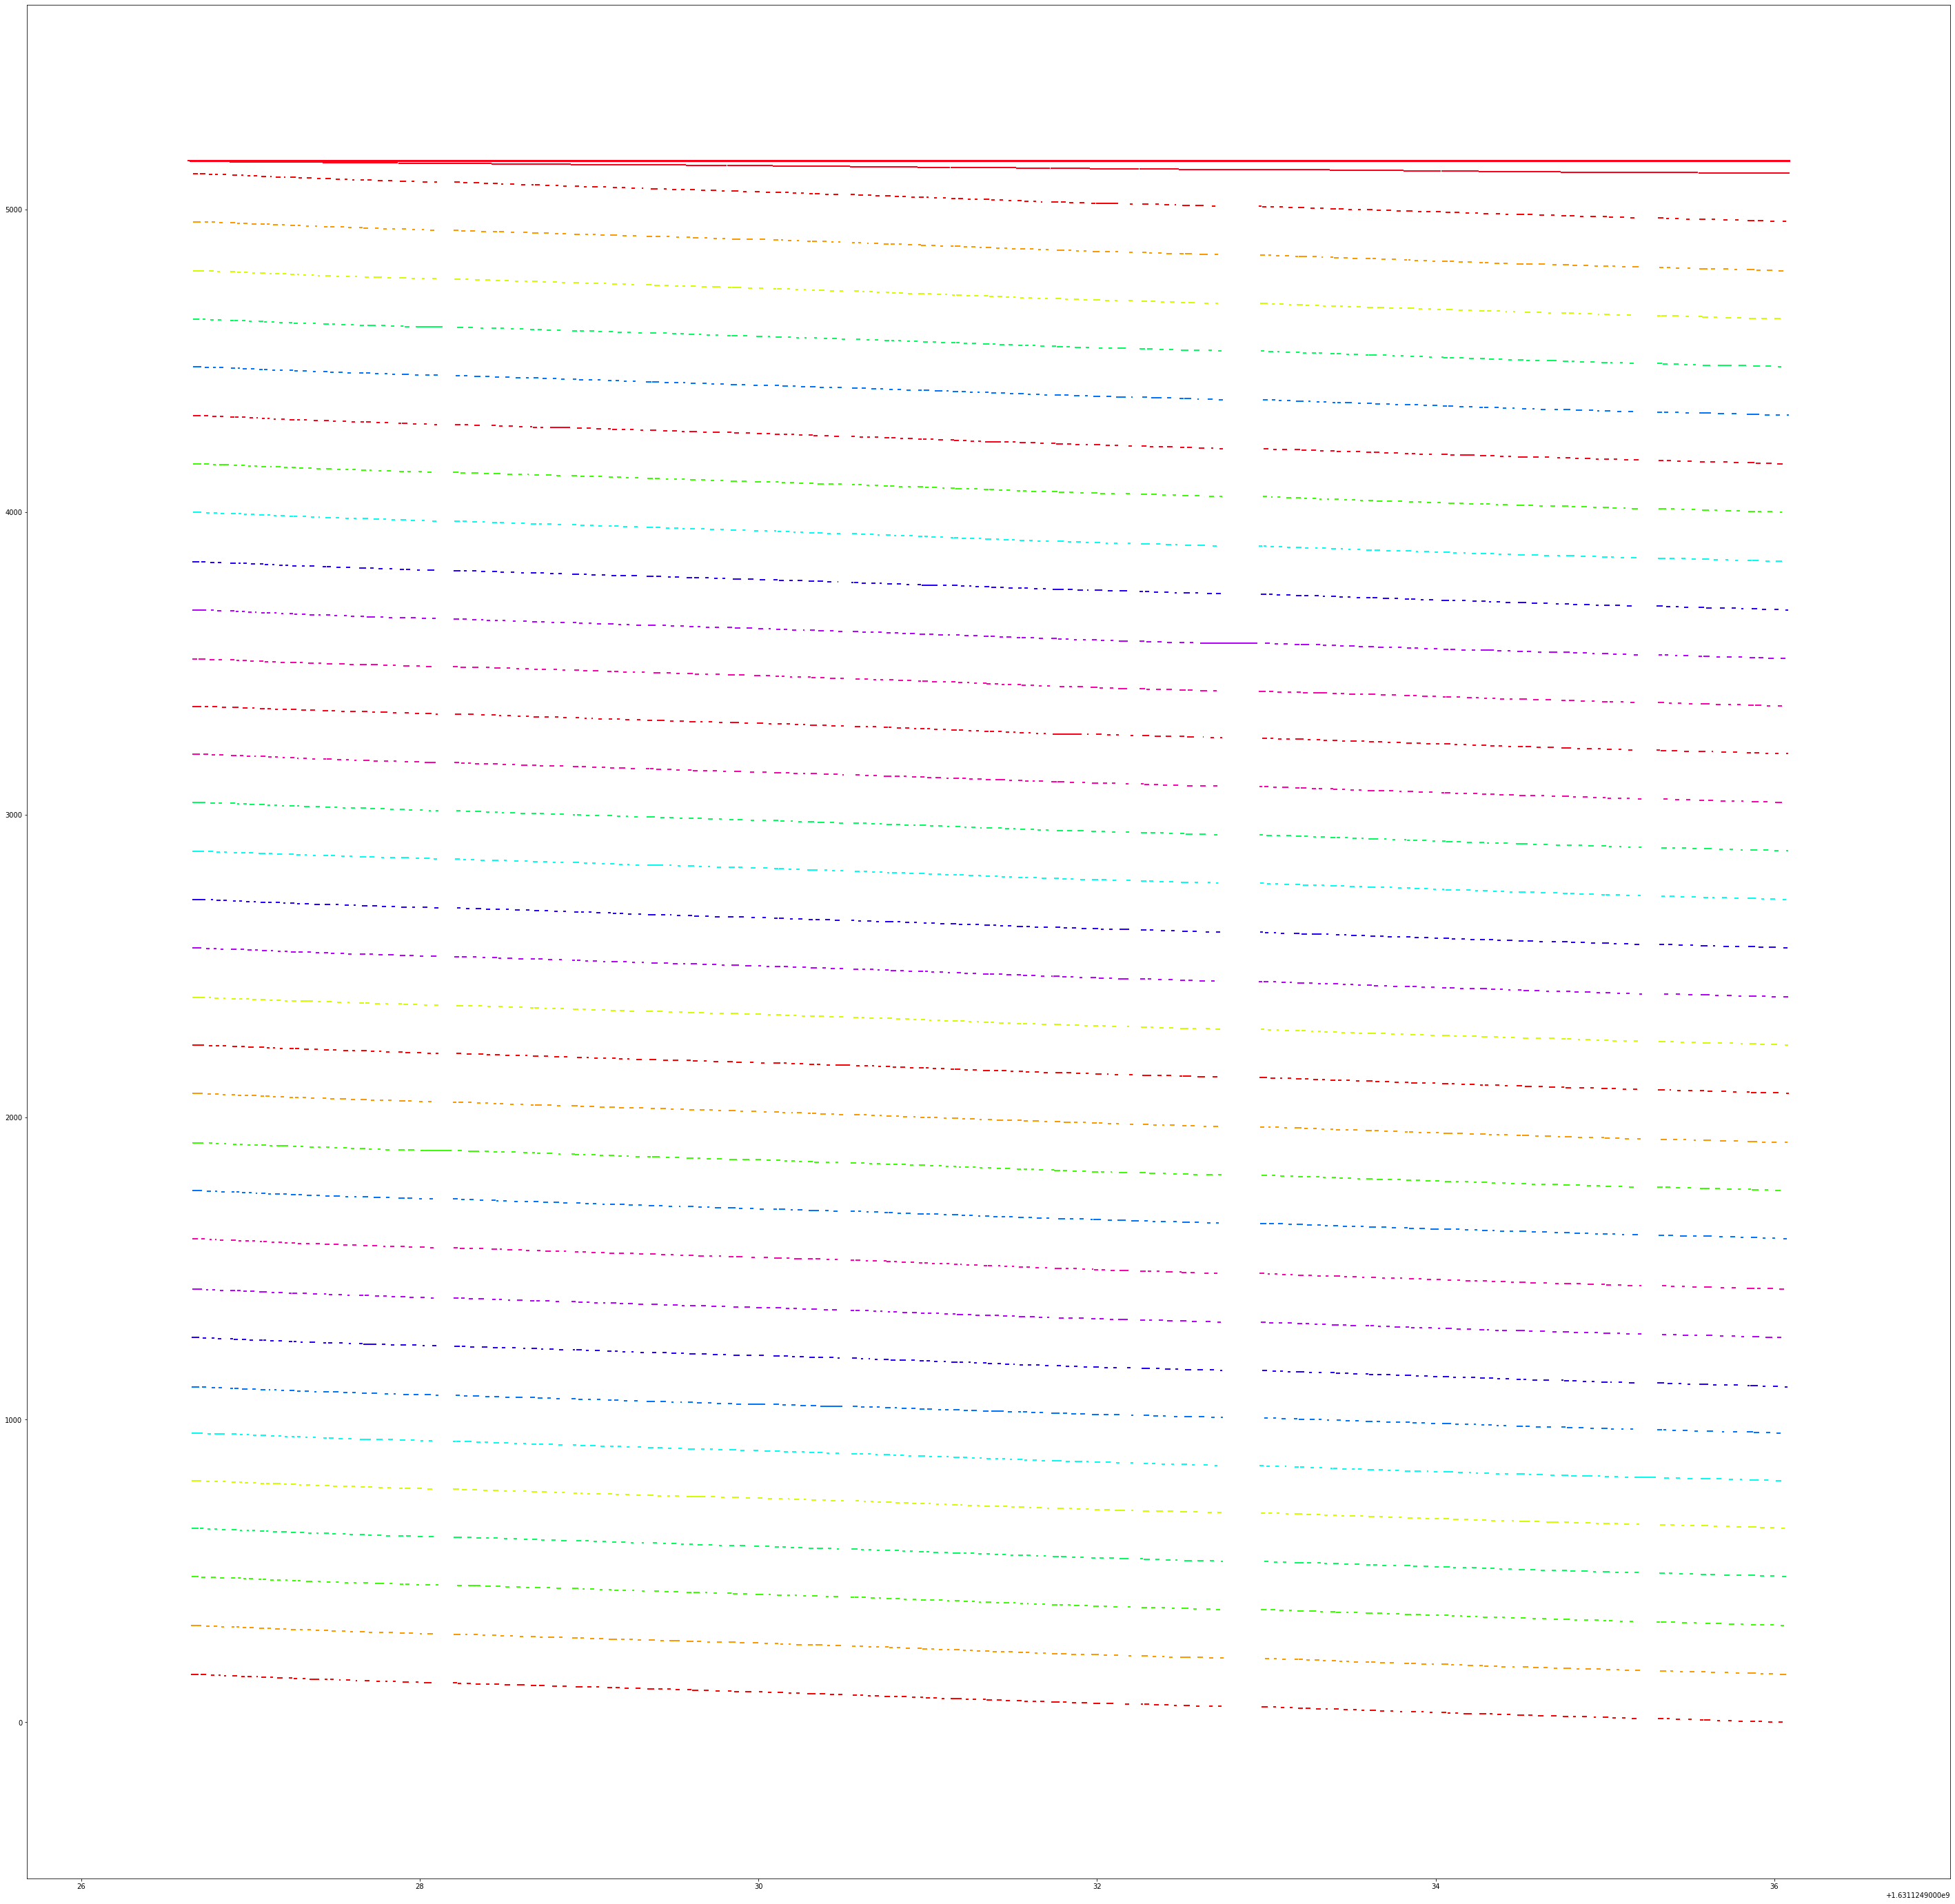

In [32]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==32]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

Let's inspect the long horizontal lines at the beginning. It looks as if the very first item takes very long to get from s3

In [33]:
df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run]["threading_ident"].drop_duplicates()

0      1.396668e+14
1      1.396642e+14
2      1.396673e+14
3      1.396675e+14
4      1.396676e+14
5      1.396677e+14
6      1.396674e+14
7      1.396667e+14
8      1.396674e+14
9      1.396643e+14
10     1.396669e+14
11     1.396661e+14
12     1.396643e+14
13     1.396666e+14
14     1.396643e+14
15     1.396668e+14
16     1.396667e+14
17     1.396670e+14
18     1.396675e+14
19     1.396677e+14
20     1.396673e+14
21     1.396672e+14
22     1.396675e+14
23     1.396672e+14
24     1.396672e+14
26     1.396671e+14
27     1.396643e+14
28     1.396669e+14
29     1.396671e+14
34     1.396669e+14
35     1.396670e+14
38     1.396667e+14
128    1.396712e+14
Name: threading_ident, dtype: float64

<AxesSubplot:xlabel='time_end', ylabel='elapsed'>

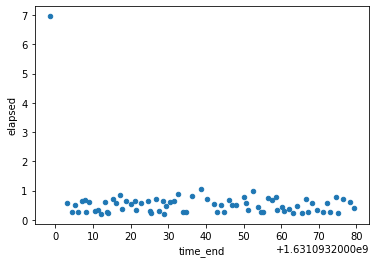

In [34]:
df_dataloader_zeroworkers[df_dataloader_zeroworkers["threading_ident"]==140353550149376].plot.scatter(x="time_end", y="elapsed")

total_elapsed=0:00:11.099556
total_bytes=686.8 MB
overall rate 61.9 MB/s
overall rate 495.0 MBit/s


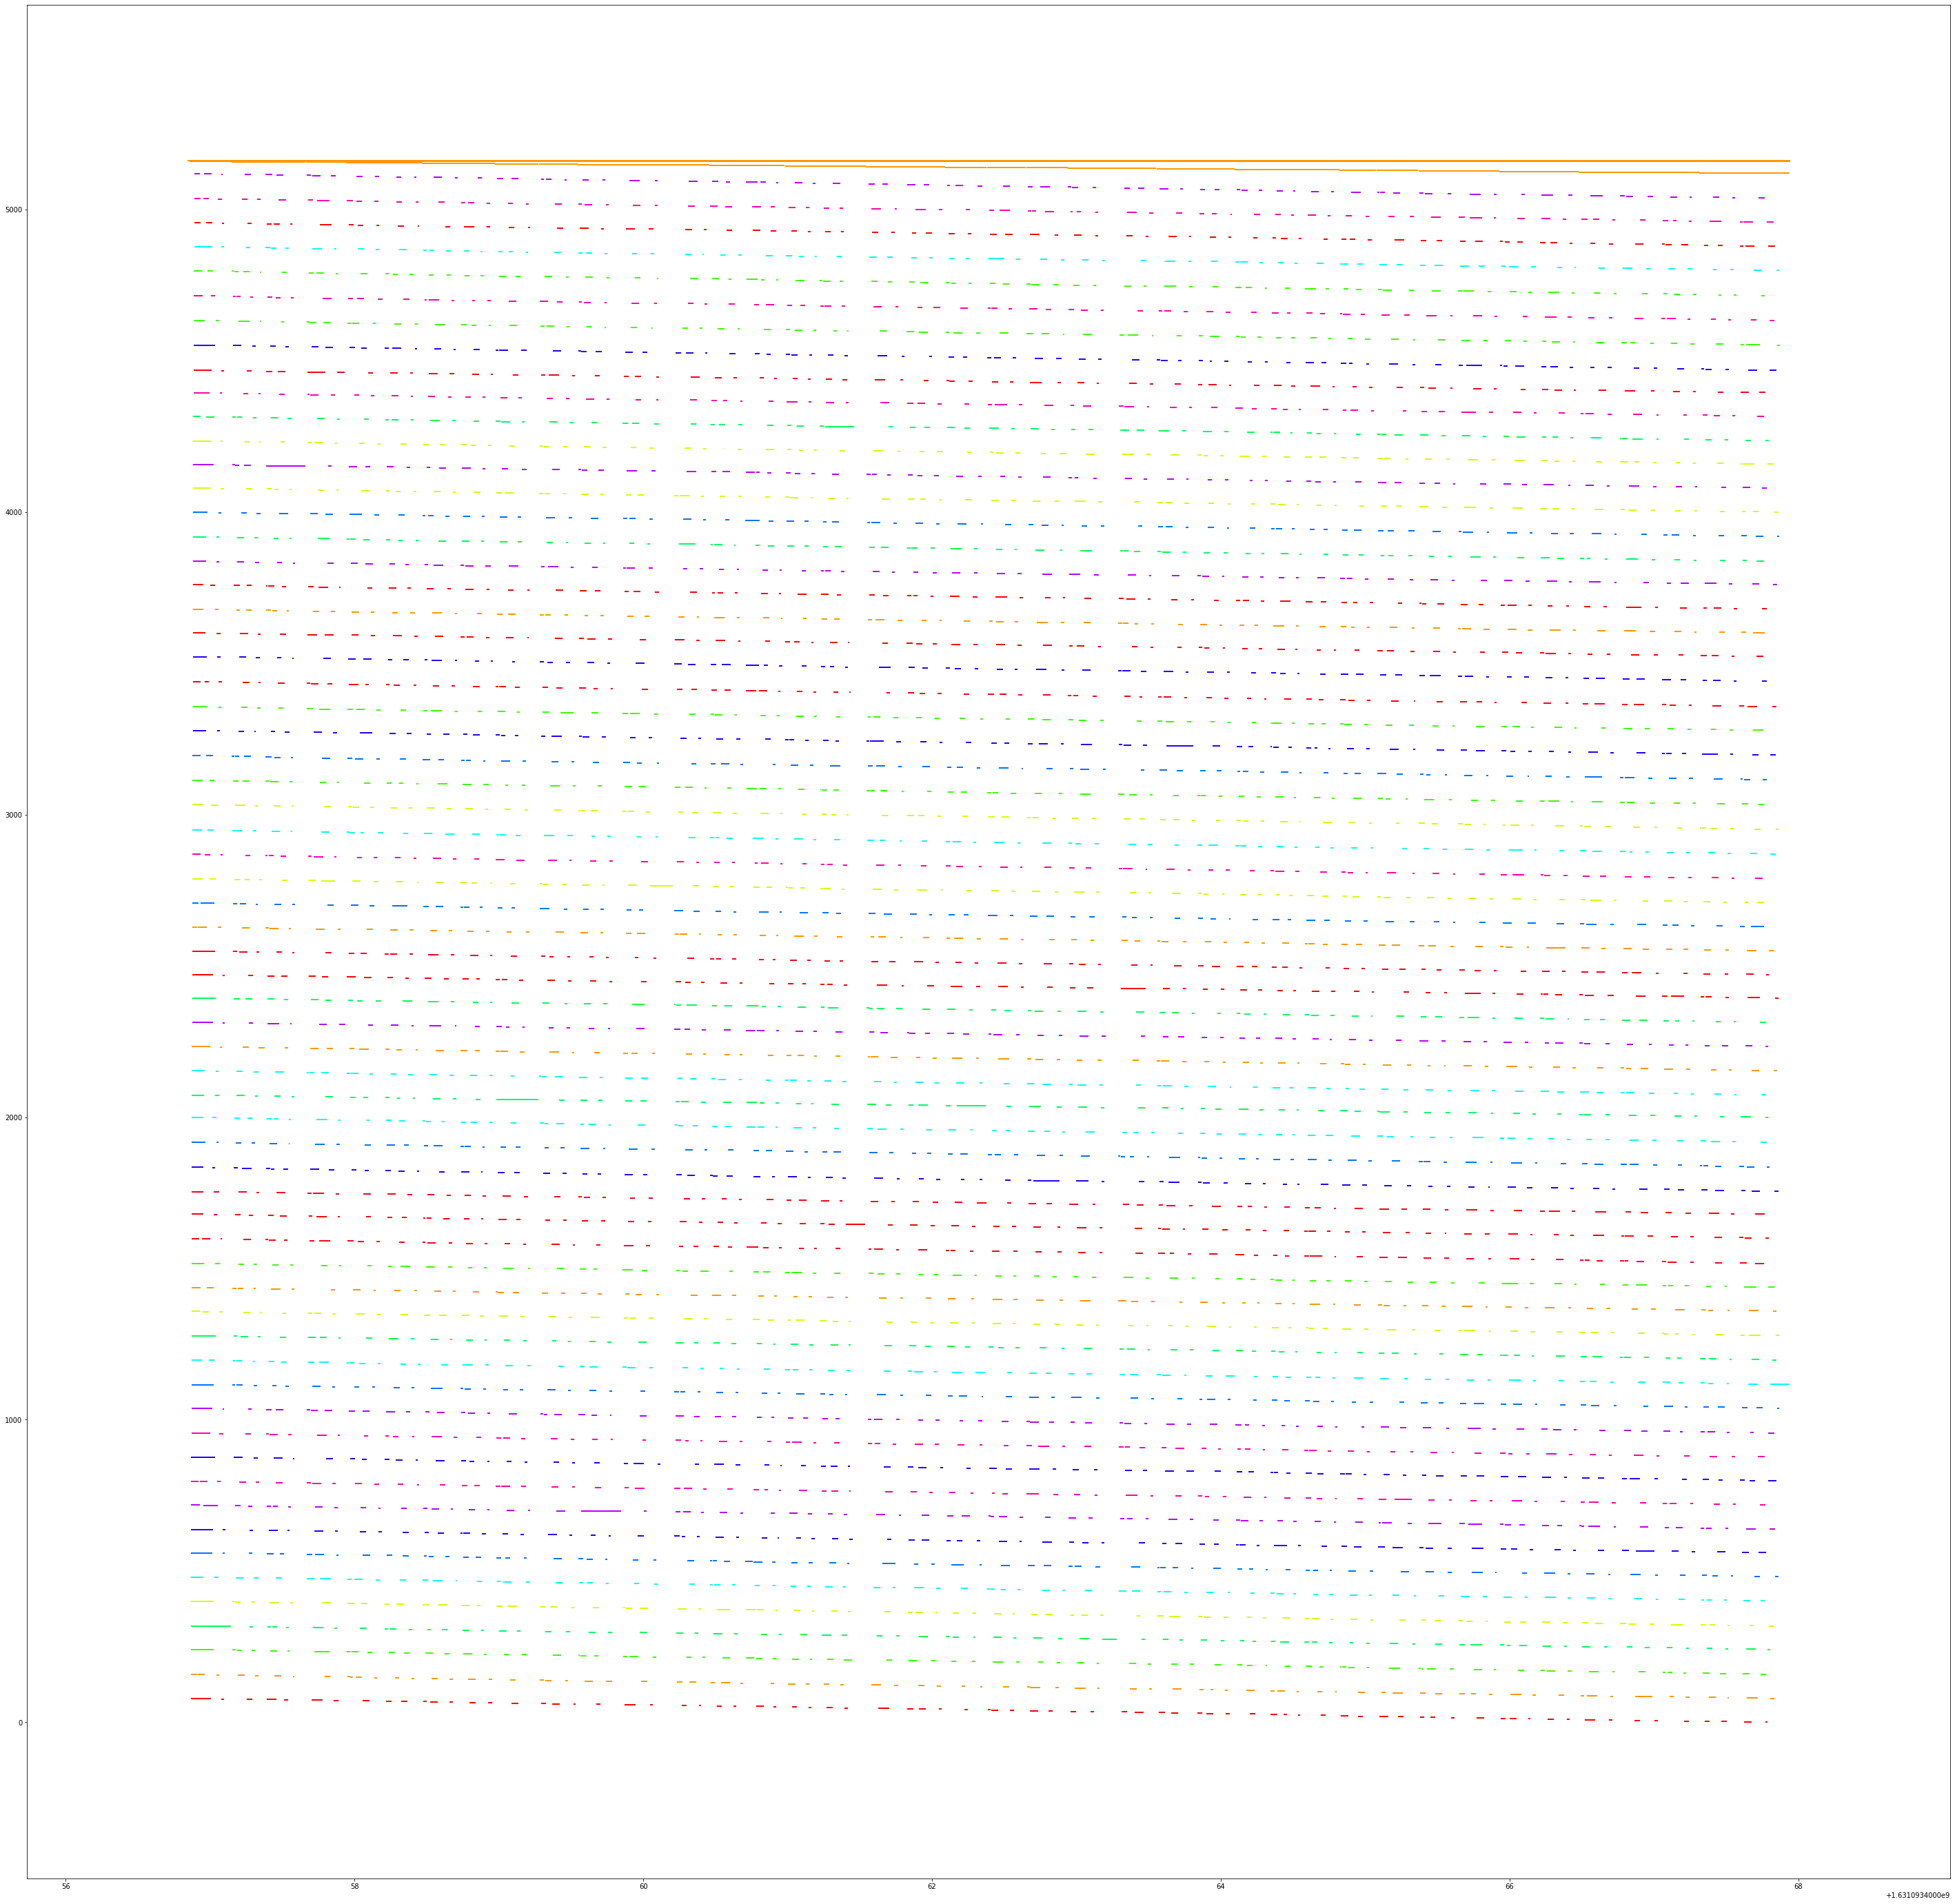

In [35]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==64]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

## Visualizing pipelineing with multiple workers

In [36]:
output_base_folder_pipelining = Path("/iarai/work/logs/storage_benchmarking")

In [44]:
display(get_run_stats(df_dataloader[df_dataloader["num_workers"]>0], group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers run                                                                       
s3      16                1           20210908193653_benchmark_dataloader_s3_32_1_16_...          344983522.0   
                                      20210908193935_benchmark_dataloader_s3_32_1_16_...          344214416.0   
                                      20210912f142142_benchmark_dataloader_s3_32_1_16...          351971616.0   
                          2           20210908193727_benchmark_dataloader_s3_32_2_16_...          357957292.0   
                                      20210908194003_benchmark_dataloader_s3_32_2_16_...          357099164.0   
                                      20210912f142216_benchmark_dataloader_s3_32_2_16...          344462404.0   
                          4           20210908194019_benchmark_dataloader_s3_32_4_16_...          391260492.0   
                                      20210912f142232_benchmark_dataloader_s3_32_4_16...          377243570.0   
                          8           20210908193743_benchmark_dataloader_s3_32_8_16_...          415836114.0   
                                      20210908194030_benchmark_dataloader_s3_32_8_16_...          407672610.0   
                                      20210912f142243_benchmark_dataloader_s3_32_8_16...          412089384.0   
                          16          20210908193753_benchmark_dataloader_s3_32_16_16...                  0.0   
                                      20210908194040_benchmark_dataloader_s3_32_16_16...          568175144.0   
                                      20210912f142253_benchmark_dataloader_s3_32_16_1...          560275558.0   
                          32          20210908194053_benchmark_dataloader_s3_32_32_16...          784809504.0   
                                      20210912f142305_benchmark_dataloader_s3_32_32_1...          808168906.0   
        32                1           20210908193209_benchmark_dataloader_s3_32_1_32_...           44856182.0   
scratch 16                1           20210908194112_benchmark_dataloader_scratch_32_...          346752022.0   
                                      20210912f142324_benchmark_dataloader_scratch_32...          344389078.0   
                          2           20210908194115_benchmark_dataloader_scratch_32_...          367363314.0   
                                      20210912f142327_benchmark_dataloader_scratch_32...          376863412.0   
                          4           20210908194117_benchmark_dataloader_scratch_32_...          375095300.0   
                                      20210912f142330_benchmark_dataloader_scratch_32...          399580388.0   
                          8           20210908194118_benchmark_dataloader_scratch_32_...          472563198.0   
                                      20210912f142331_benchmark_dataloader_scratch_32...          453844378.0   
                          16          20210908194120_benchmark_dataloader_scratch_32_...          505032926.0   
                                      20210912f142333_benchmark_dataloader_scratch_32...          528841816.0   
                          32          20210908194121_benchmark_dataloader_scratch_32_...          794487866.0   
                                      20210912f142334_benchmark_dataloader_scratch_32...          680504220.0   

                                                                                            time_start  \
dataset num_fetch_workers num_workers run                                                                
s3      16                1           20210908193653_benchmark_dataloader_s3_32_1_16_...  1.631123e+09   
                                      20210908193935_benchmark_dataloader_s3_32_1_16_...  1.631123e+09   
                                      20210912f142142_benchmark_dataloader_s3_32_1_16...  1.631449e+09   
                          2           20210908193727_ben

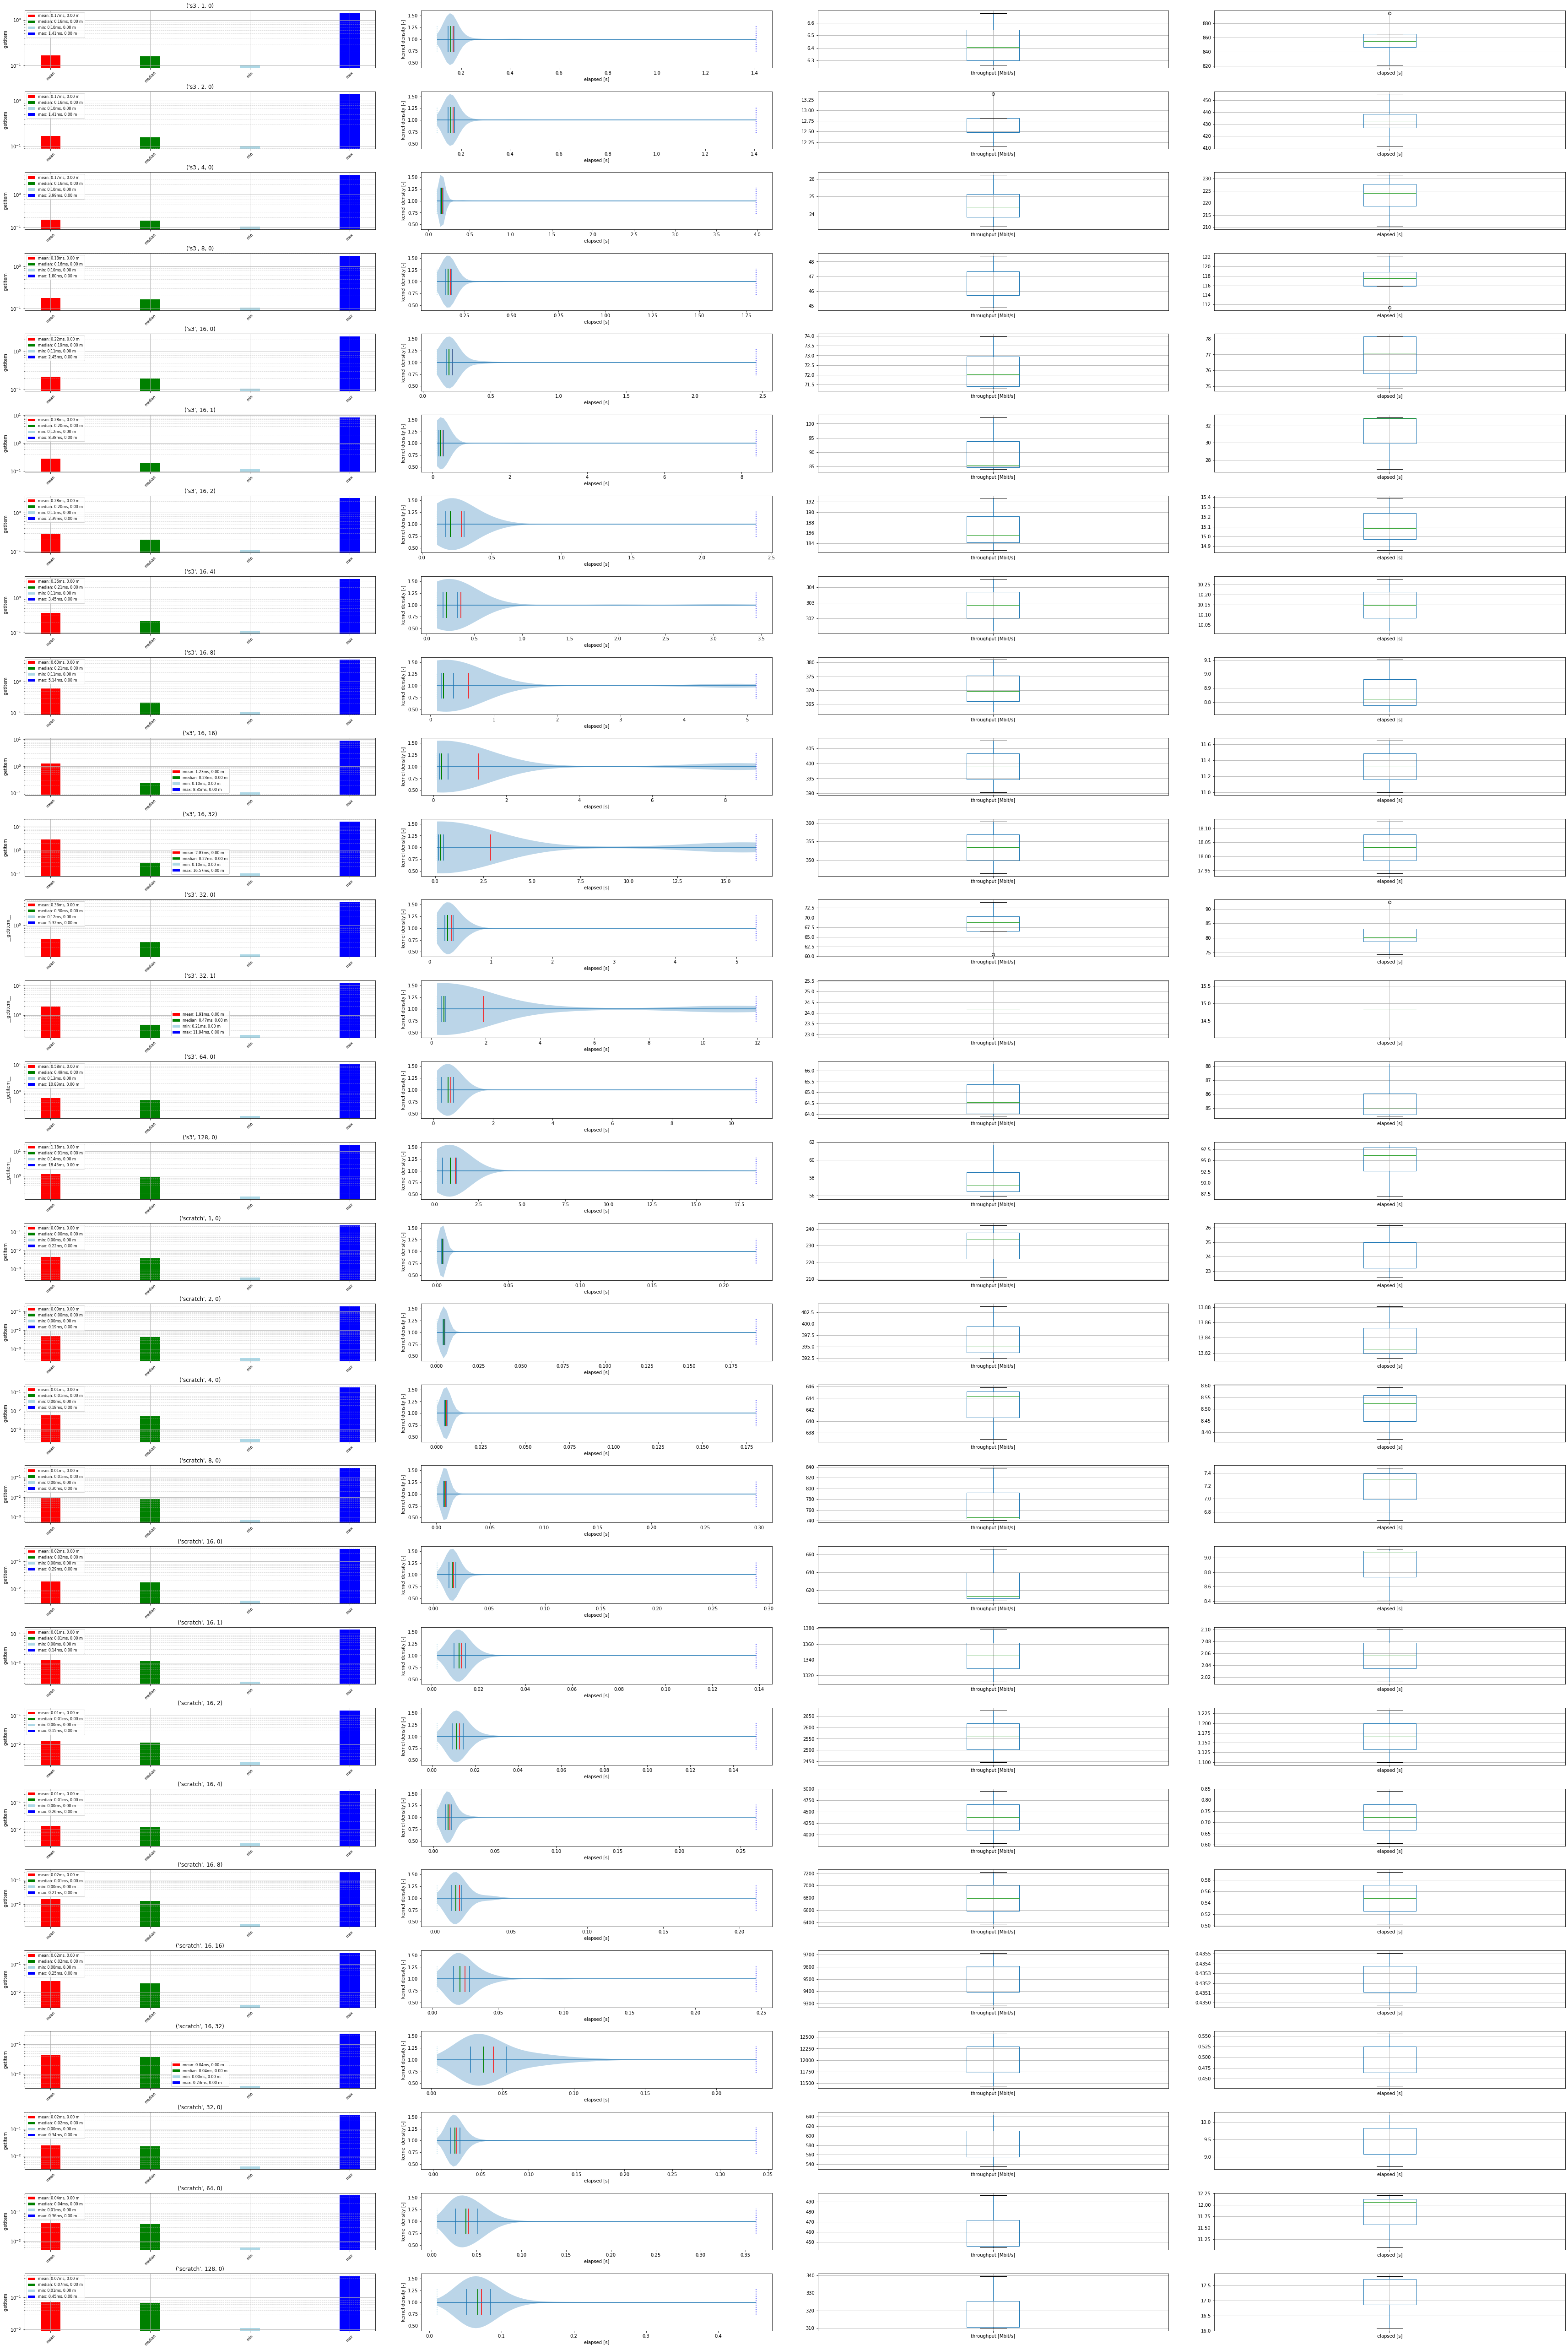

In [38]:
plot_all(df_dataloader, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataloader)

In [ ]:
# TODO heatmap num_fetch_workers/num_workers -> throughput.

,trace_name,trace_level,function_name,elapsed,time_start,time_end,process_time,process_time_start,process_time_end,pid,...,repeat,num_batches,shuffle,system,node,release,version,machine,source_file,run
0,(5)-get_item,5.0,__getitem__,0.030244,1.631449e+09,1.631449e+09,0.105422,0.765798,0.871220,51108.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
1,(5)-get_item,5.0,__getitem__,0.033100,1.631449e+09,1.631449e+09,0.125716,0.767334,0.893050,51108.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
2,(5)-get_item,5.0,__getitem__,0.036252,1.631449e+09,1.631449e+09,0.133786,0.765239,0.899025,51108.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
3,(5)-get_item,5.0,__getitem__,0.031816,1.631449e+09,1.631449e+09,0.129611,0.771419,0.901031,51108.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
4,(5)-get_item,5.0,__getitem__,0.033487,1.631449e+09,1.631449e+09,0.136592,0.772405,0.908997,51108.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,(5)-get_item,5.0,__getitem__,0.009122,1.631449e+09,1.631449e+09,0.047630,2.768028,2.815658,51075.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
228,(5)-get_item,5.0,__getitem__,0.011218,1.631449e+09,1.631449e+09,0.064515,2.752122,2.816638,51075.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
229,(5)-get_item,5.0,__getitem__,0.011400,1.631449e+09,1.631449e+09,0.061137,2.757751,2.818887,51075.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...
230,(4)-threadedmapdataset-fetcher,4.0,fetch,0.049436,1.631449e+09,1.631449e+09,0.250433,2.569151,2.819583,51075.0,...,1,40,True,Linux,tu-fat-5,4.19.0-17-amd64,#1 SMP Debian 4.19.194-1 (2021-06-10),x86_64,/Users/che/iarai/work/logs/storage_benchmarkin...,20210912f142331_benchmark_dataloader_scratch_3...


total_elapsed=0:00:00.660170
total_bytes=453.8 MB
overall rate 687.5 MB/s
overall rate 5.5 GBit/s


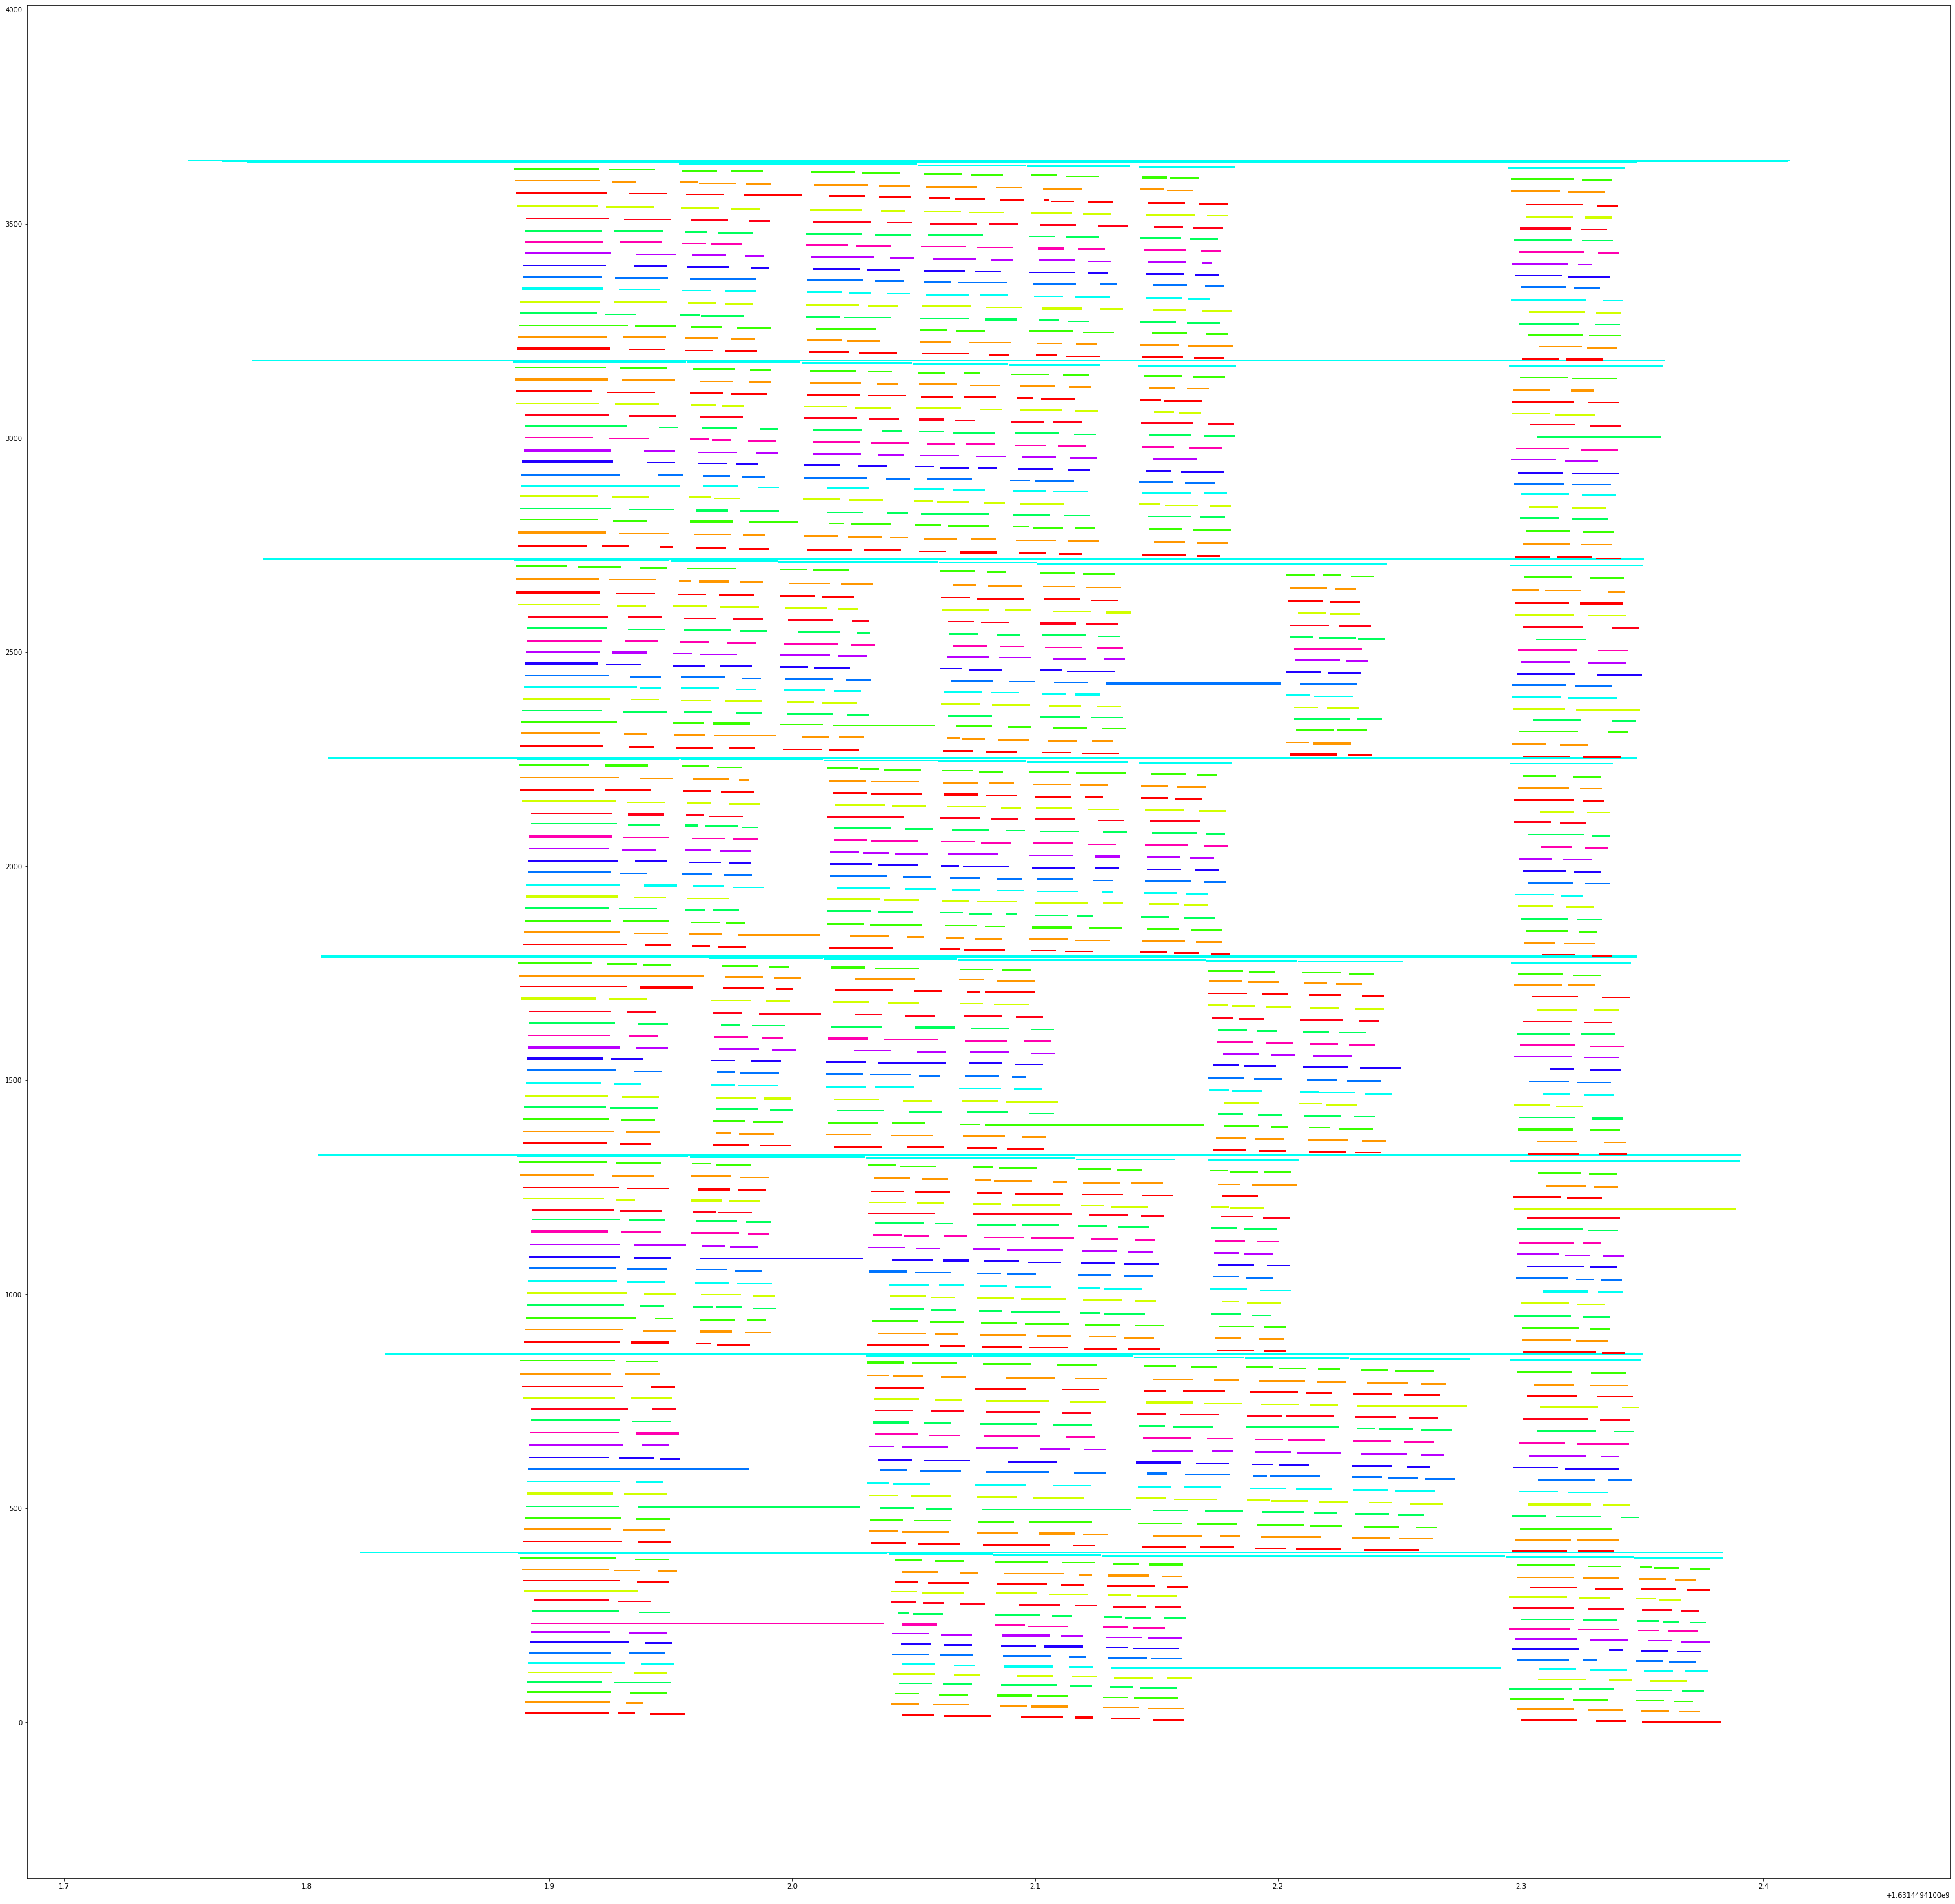

In [47]:

#run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==64]["run"].iloc[0]
run = "20210912f142331_benchmark_dataloader_scratch_32_8_16_sync"
display(df_dataloader[df_dataloader["run"]==run])
plot_events_timeline(df_dataloader[df_dataloader["run"]==run])

In [88]:
throughputs = get_throughputs(df_dataloader, group_by=group_by_dataloader)
display(throughputs)

total_elpased_time [s]  \
dataset num_fetch_workers num_workers                           
s3      1                 0                       3425.830479   
        2                 0                       1732.477158   
        4                 0                        890.071905   
        8                 0                        468.761637   
        16                0                        307.317924   
                          1                         93.038141   
                          2                         45.607570   
                          4                         20.544844   
                          8                         27.146291   
                          16                        30.765713   
                          32                        36.870475   
        32                0                        327.131761   
                          1                         14.918982   
        64                0                        342.624856   
        128               0                        377.781538   
scratch 1                 0                         73.298536   
        2                 0                         42.470612   
        4                 0                         26.224278   
        8                 0                         22.130958   
        16                0                         27.254946   
                          1                          4.256989   
                          2                          2.514743   
                          4                          1.659545   
                          8                          1.398367   
                          16                         1.361188   
                          32                         1.769235   
        32                0                         29.006739   
        64                0                         36.033928   
        128               0                         52.296429   

                                       downloaded data [MB]  \
dataset num_fetch_workers num_workers                         
s3      1                 0                     2755.061129   
        2                 0                     2745.169614   
        4                 0                     2729.763915   
        8                 0                     2725.595388   
        16                0                     2776.845574   
                          1                     1041.169554   
                          2                     1059.518860   
                          4                      768.504062   
                          8                     1235.598108   
                          16                    1128.450702   
                          32                    1592.978410   
        32                0                     2764.904491   
                          1                       44.856182   
        64                0                     2775.330433   
        128               0                     2730.964748   
scratch 1                 0                     2067.901966   
        2                 0                     2061.051664   
        4                 0                     2046.652394   
        8                 0                     2072.598167   
        16                0                     2088.263515   
                          1                      691.141100   
                          2                      744.226726   
                          4                      774.675688   
                          8                      926.407576   
                          16                    1033.874742   
                          32                    1474.992086   
        32                0                     2065.683155   
        64                0                     2040.180203   
        128               0                     2058.064975   

                                       med. throughput [MBit/s]  \
da

In [89]:
throughputs = throughputs.reset_index()


array([  6.43361928,  12.67627501,  24.53522148,  46.51567318,
        72.28593867,  89.52625625, 185.84965033, 299.24941721,
       364.13021792, 293.43073222, 345.63772718,  67.61567843,
        24.053214  ,  64.80161341,  57.83161907])

In [92]:
display(throughputs)
s3_throughputs = throughputs[throughputs["dataset"]=="s3"]
#throughputs[throughputs["dataset"]=="s3"].to_numpy()

,dataset,num_fetch_workers,num_workers,total_elpased_time [s],downloaded data [MB],med. throughput [MBit/s],avg. throughput [MBit/s],min. throughput [MBit/s],max. throughput [MBit/s],throughput [MBit/s]
0,s3,1,0,3425.830479,2755.061129,6.406787,6.437976,6.262156,6.676175,6.433619
1,s3,2,0,1732.477158,2745.169614,12.610769,12.691655,12.160032,13.385048,12.676275
2,s3,4,0,890.071905,2729.763915,24.397942,24.574387,23.266577,26.235087,24.535221
3,s3,8,0,468.761637,2725.595388,46.480962,46.557061,44.877656,48.388664,46.515673
4,s3,16,0,307.317924,2776.845574,71.994954,72.305150,71.283232,73.947460,72.285939
5,s3,16,1,93.038141,1041.169554,85.110514,90.274024,83.801650,101.909908,89.526256
6,s3,16,2,45.607570,1059.518860,184.507229,185.886821,181.604916,191.548319,185.849650
7,s3,16,4,20.544844,768.504062,299.227941,299.227941,297.509547,300.946336,299.249417
8,s3,16,8,27.146291,1235.598108,363.035612,364.244937,355.924337,373.774864,364.130218
9,s3,16,16,30.765713,1128.450702,382.064759,260.364484,0.000000,399.028693,293.430732


<IPython.core.display.Javascript object>


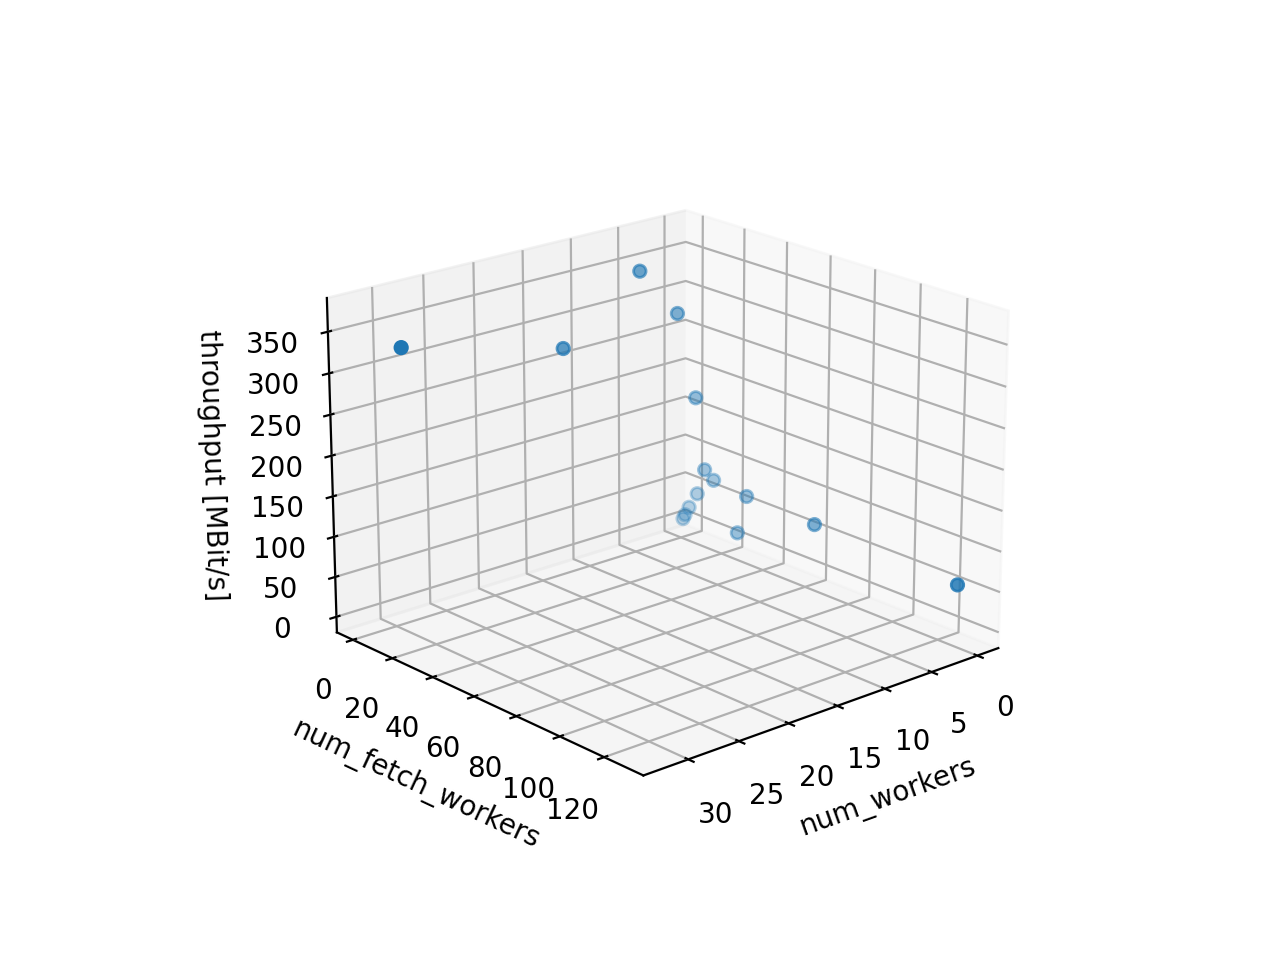

Text(0.5, 0, 'throughput [MBit/s]')

In [98]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(s3_throughputs["num_workers"], s3_throughputs["num_fetch_workers"], s3_throughputs["throughput [MBit/s]"])
ax.set_xlabel('num_workers')
ax.set_ylabel('num_fetch_workers')
ax.set_zlabel('throughput [MBit/s]')